test: Google Collab -> Github via commit

# 📊 Визуализация данных: matplotlib, seaborn и Plotly


В этом ноутбуке вы научитесь:
- Создавать различные типы графиков
- Выбирать подходящую визуализацию для данных
- Оформлять графики профессионально
- Создавать интерактивные дашборды
- Анализировать данные через визуализацию

---
# 🎯 ЧАСТЬ 1: ОСНОВЫ MATPLOTLIB
---

## Введение: Зачем нужна визуализация?

### Почему графики важнее таблиц?
- **Скорость восприятия**: мозг обрабатывает визуальную информацию за 250 мс, а текст за 3+ сек
- **Выявление паттернов**: графики раскрывают тренды и аномалии, которые не видны в числах
- **Коммуникация**: один график понятнее 1000 строк кода
- **Исследование**: визуализация помогает сформулировать гипотезы

### Хорошая визуализация:
1. ✅ Ясная и простая
2. ✅ Рассказывает историю
3. ✅ Избегает бесполезных украшений
4. ✅ Доступна для целевой аудитории

## 1.1 Настройка окружения

In [1]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Настройки для красивых графиков
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

# Проверяем версии
print(f"matplotlib версия: {plt.matplotlib.__version__}")
print(f"seaborn версия: {sns.__version__}")
print(f"numpy версия: {np.__version__}")
print(f"pandas версия: {pd.__version__}")

matplotlib версия: 3.10.0
seaborn версия: 0.13.2
numpy версия: 2.0.2
pandas версия: 2.2.2


---
## 1.2 Линейные графики (Line plots)

### Когда использовать линейные графики?
- **Временные ряды** (изменения во времени)
- **Демонстрация трендов** (как значение растет/падает)
- **Сравнение нескольких показателей** на одном графике

### Как читать линейный график?
- **Ось X**: обычно время или последовательность событий
- **Ось Y**: значение показателя
- **Наклон линии**: скорость изменения (крутой = быстро меняется)
- **Пересечения**: точки равенства значений

### Пример 1: Простой линейный график

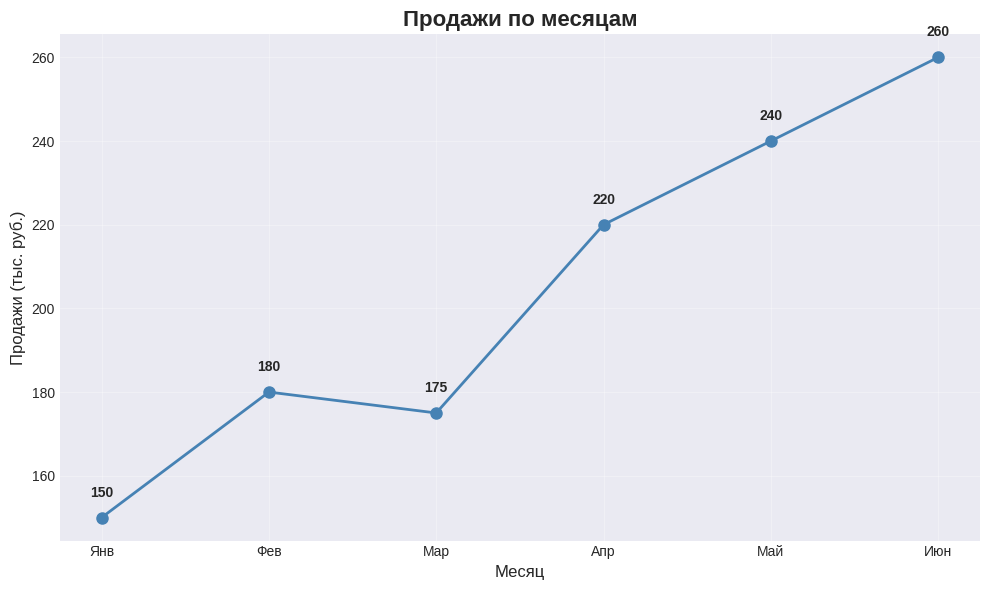

Минимальные продажи: 150 тыс. руб. в Янв
Максимальные продажи: 260 тыс. руб. в Июн
Прирост продаж: 110 тыс. руб. за период


In [2]:
# Создаем данные: продажи по месяцам
months = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн']
sales = [150, 180, 175, 220, 240, 260]

# Создаем график
plt.figure(figsize=(10, 6))
plt.plot(months, sales, marker='o', linewidth=2, color='steelblue', markersize=8)

# Добавляем подписи
plt.title('Продажи по месяцам', fontsize=16, fontweight='bold')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Продажи (тыс. руб.)', fontsize=12)
plt.grid(True, alpha=0.3)

# Показываем значения на каждой точке
for i, (month, sale) in enumerate(zip(months, sales)):
    plt.text(i, sale + 5, str(sale), ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Минимальные продажи: {min(sales)} тыс. руб. в {months[sales.index(min(sales))]}")
print(f"Максимальные продажи: {max(sales)} тыс. руб. в {months[sales.index(max(sales))]}")
print(f"Прирост продаж: {sales[-1] - sales[0]} тыс. руб. за период")

### Объяснение параметров:
- `marker='o'` — использует круги для обозначения точек
- `linewidth=2` — толщина линии
- `color='steelblue'` — цвет линии
- `markersize=8` — размер маркеров
- `figsize=(10, 6)` — размер фигуры в дюймах (ширина×высота)

### Пример 2: Несколько линий на одном графике

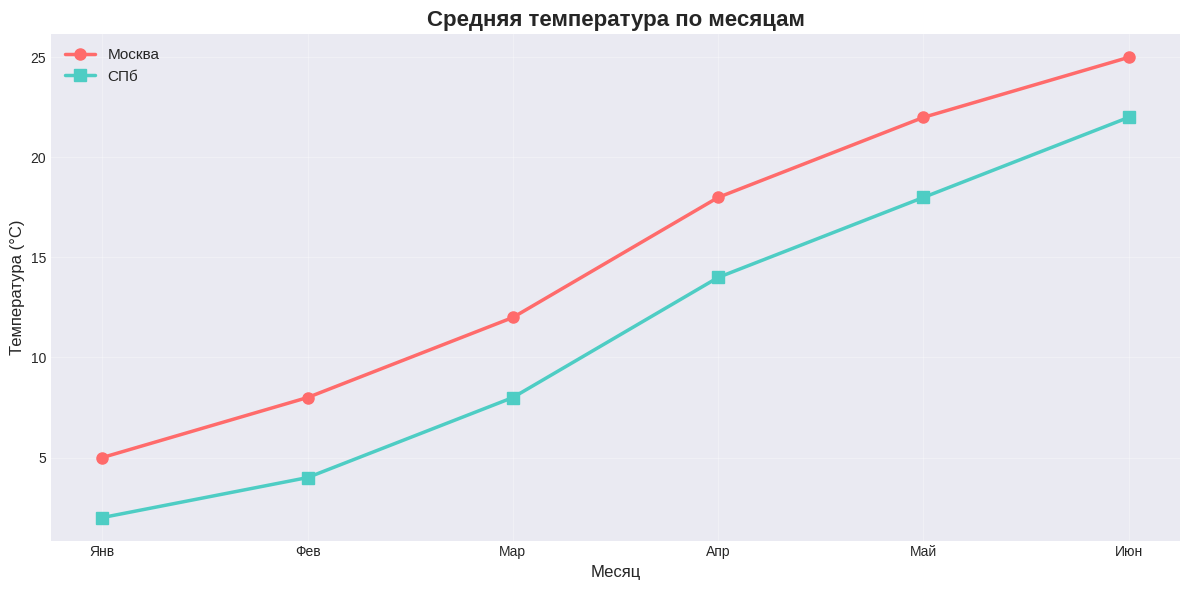

In [3]:
# Данные для двух городов
months = np.array([1, 2, 3, 4, 5, 6])
moscow_temp = [5, 8, 12, 18, 22, 25]
spb_temp = [2, 4, 8, 14, 18, 22]

plt.figure(figsize=(12, 6))

# График для Москвы
plt.plot(months, moscow_temp, marker='o', linewidth=2.5,
         color='#FF6B6B', label='Москва', markersize=8)

# График для СПб
plt.plot(months, spb_temp, marker='s', linewidth=2.5,
         color='#4ECDC4', label='СПб', markersize=8)

plt.title('Средняя температура по месяцам', fontsize=16, fontweight='bold')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Температура (°C)', fontsize=12)
plt.xticks(months, ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн'])
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## ✏️ ЗАДАНИЕ 1.2

Создайте график изменения курса доллара по дням недели:
- Понедельник: 92.5
- Вторник: 93.1
- Среда: 92.8
- Четверг: 94.2
- Пятница: 95.0

**Требования:**
1. Добавьте два ряда: один для доллара, второй для евро (придумайте данные)
2. Используйте разные цвета и маркеры
3. Добавьте легенду
4. Выводы: напишите print() с минимальным/максимальным курсом

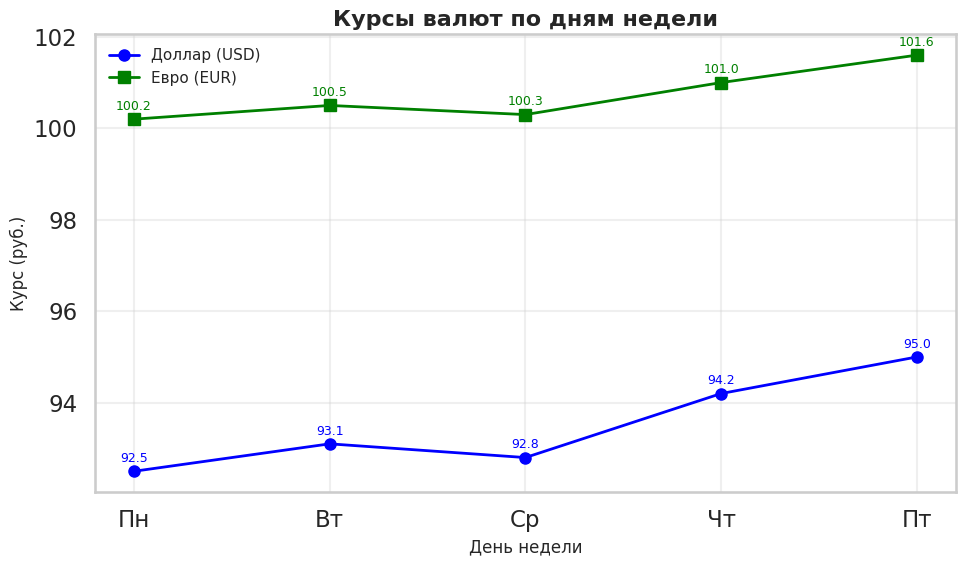

Минимальный курс USD: 92.5 руб. в Пн
Максимальный курс USD: 95.0 руб. в Пт
Минимальный курс EUR: 100.2 руб. в Пн
Максимальный курс EUR: 101.6 руб. в Пт


In [47]:
days = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт']
usd = [92.5, 93.1, 92.8, 94.2, 95.0]
eur = [100.2, 100.5, 100.3, 101.0, 101.6]

plt.figure(figsize=(10, 6))
plt.plot(days, usd, marker='o', linewidth=2, color='blue', label='Доллар (USD)', markersize=8)
plt.plot(days, eur, marker='s', linewidth=2, color='green', label='Евро (EUR)', markersize=8)
plt.title('Курсы валют по дням недели', fontsize=16, fontweight='bold')
plt.xlabel('День недели', fontsize=12)
plt.ylabel('Курс (руб.)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
for i, (d, u, e) in enumerate(zip(days, usd, eur)):
    plt.text(i, u + 0.2, f'{u}', ha='center', fontsize=9, color='blue')
    plt.text(i, e + 0.2, f'{e}', ha='center', fontsize=9, color='green')
plt.tight_layout()
plt.show()

print(f"Минимальный курс USD: {min(usd)} руб. в {days[usd.index(min(usd))]}")
print(f"Максимальный курс USD: {max(usd)} руб. в {days[usd.index(max(usd))]}")
print(f"Минимальный курс EUR: {min(eur)} руб. в {days[eur.index(min(eur))]}")
print(f"Максимальный курс EUR: {max(eur)} руб. в {days[eur.index(max(eur))]}")

---
## 1.3 Столбчатые диаграммы (Bar plots)

### Когда использовать столбчатые диаграммы?
- **Сравнение категорий** (какой город больше, какой язык популярнее)
- **Рейтинги и топы** (ТОП-10 фильмов, лучшие страны)
- **Дискретные данные** (количество людей, количество товаров)

### Вертикальные vs горизонтальные столбцы:
- **Вертикальные**: когда категорий немного и названия короткие
- **Горизонтальные**: когда много категорий или длинные названия

### Пример 3: Вертикальная столбчатая диаграмма

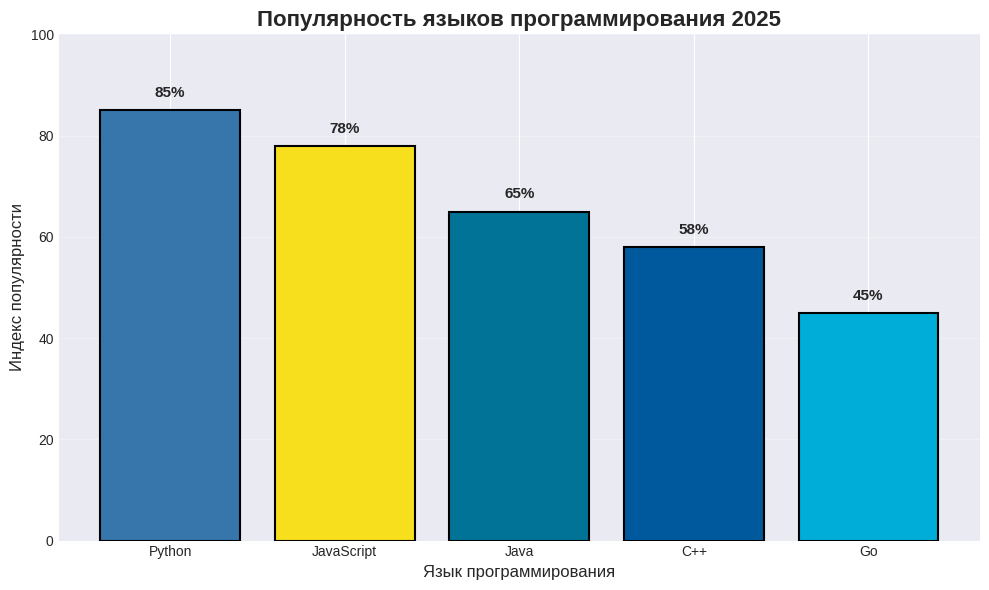

Самый популярный язык: Python (85%)
Разница между Python и Go: 40 пункта


In [5]:
# Данные: популярность языков программирования
languages = ['Python', 'JavaScript', 'Java', 'C++', 'Go']
popularity = [85, 78, 65, 58, 45]
colors = ['#3776ab', '#f7df1e', '#007396', '#00599c', '#00add8']

plt.figure(figsize=(10, 6))
bars = plt.bar(languages, popularity, color=colors, edgecolor='black', linewidth=1.5)

plt.title('Популярность языков программирования 2025', fontsize=16, fontweight='bold')
plt.xlabel('Язык программирования', fontsize=12)
plt.ylabel('Индекс популярности', fontsize=12)
plt.ylim(0, 100)

# Подписываем значения над столбцами
for bar, value in zip(bars, popularity):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{value}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Анализ
print(f"Самый популярный язык: {languages[popularity.index(max(popularity))]} ({max(popularity)}%)")
print(f"Разница между Python и Go: {popularity[0] - popularity[-1]} пункта")

### Пример 4: Горизонтальная столбчатая диаграмма (barh)

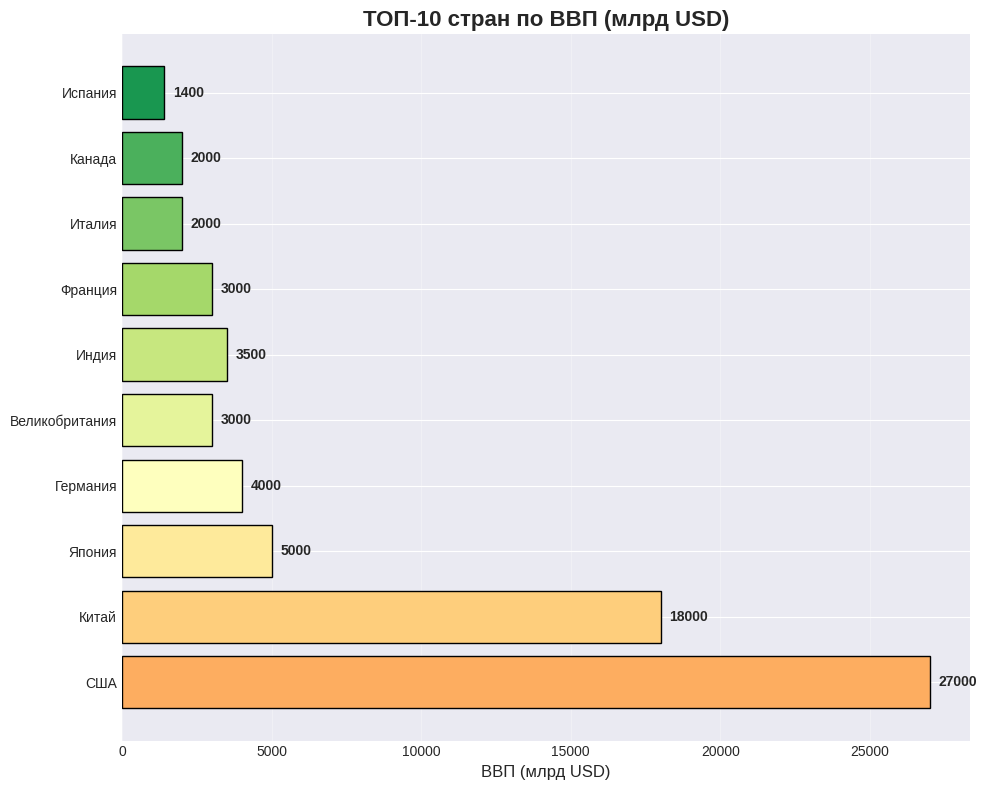

In [6]:
# Данные: ТОП-10 стран по ВВП (условные данные)
countries = ['США', 'Китай', 'Япония', 'Германия', 'Великобритания',
             'Индия', 'Франция', 'Италия', 'Канада', 'Испания']
gdp = [27000, 18000, 5000, 4000, 3000, 3500, 3000, 2000, 2000, 1400]

# Раскрашиваем в зависимости от значения
colors_grad = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(countries)))

plt.figure(figsize=(10, 8))
bars = plt.barh(countries, gdp, color=colors_grad, edgecolor='black', linewidth=1)

plt.title('ТОП-10 стран по ВВП (млрд USD)', fontsize=16, fontweight='bold')
plt.xlabel('ВВП (млрд USD)', fontsize=12)

# Подписываем значения
for bar, value in zip(bars, gdp):
    width = bar.get_width()
    plt.text(width + 300, bar.get_y() + bar.get_height()/2.,
             f'{value}', ha='left', va='center', fontsize=10, fontweight='bold')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## ✏️ ЗАДАНИЕ 1.3

Создайте горизонтальную столбчатую диаграмму:

**Данные: ТОП-5 фильмов Кинопоиска (рейтинг)**
- Шоуншенк (IMDb: 9.3)
- Форрест Гамп (IMDb: 8.8)
- Побег (IMDb: 9.2)
- Матрица (IMDb: 8.7)
- Темный рыцарь (IMDb: 9.0)

**Требования:**
1. Раскрасьте столбцы в зависимости от рейтинга: ≥9.0 = зеленый, остальные = оранжевый
2. Добавьте значения рейтинга справа от каждого столбца
3. Найдите средний рейтинг

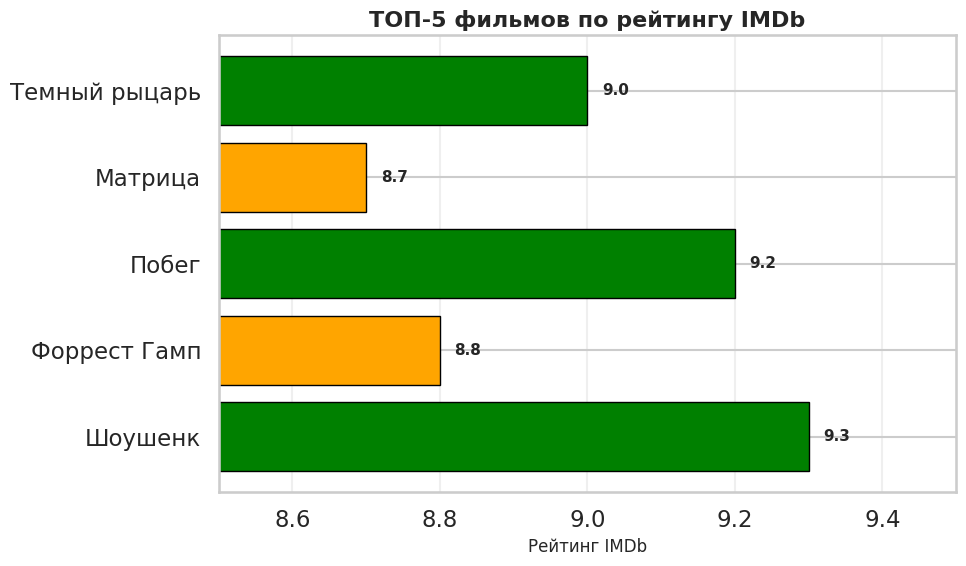

Средний рейтинг ТОП-5 фильмов: 9.00
Максимальный рейтинг: 9.3 у фильма 'Шоушенк'
Минимальный рейтинг: 8.7 у фильма 'Матрица'


In [49]:
movies = ['Шоушенк', 'Форрест Гамп', 'Побег', 'Матрица', 'Темный рыцарь']
ratings = [9.3, 8.8, 9.2, 8.7, 9.0]
colors = ['green' if r >= 9.0 else 'orange' for r in ratings]

plt.figure(figsize=(10, 6))
bars = plt.barh(movies, ratings, color=colors, edgecolor='black', linewidth=1)
plt.title('ТОП-5 фильмов по рейтингу IMDb', fontsize=16, fontweight='bold')
plt.xlabel('Рейтинг IMDb', fontsize=12)
plt.xlim(8.5, 9.5)
for bar, value in zip(bars, ratings):
    width = bar.get_width()
    plt.text(width + 0.02, bar.get_y() + bar.get_height()/2.,
             f'{value}', ha='left', va='center', fontsize=11, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

avg_rating = np.mean(ratings)
print(f"Средний рейтинг ТОП-5 фильмов: {avg_rating:.2f}")
print(f"Максимальный рейтинг: {max(ratings)} у фильма '{movies[ratings.index(max(ratings))]}'")
print(f"Минимальный рейтинг: {min(ratings)} у фильма '{movies[ratings.index(min(ratings))]}'")

---
## 1.4 Гистограммы (Histograms)

### Когда использовать гистограммы?
- **Распределение непрерывных данных** (возраст, доход, время ответа)
- **Частота значений** (сколько людей в каком диапазоне возраста)
- **Понимание формы распределения** (нормальное, скошенное, мультимодальное)

### Важные параметры:
- **bins**: количество столбцов
  - Слишком мало = потеря деталей
  - Слишком много = шум и неровная линия
  - Правило: примерно √n, где n = количество значений
- **alpha**: прозрачность (0-1, где 1 = полностью непрозрачно)
- **edgecolor**: цвет границ столбцов

### Пример 5: Простая гистограмма

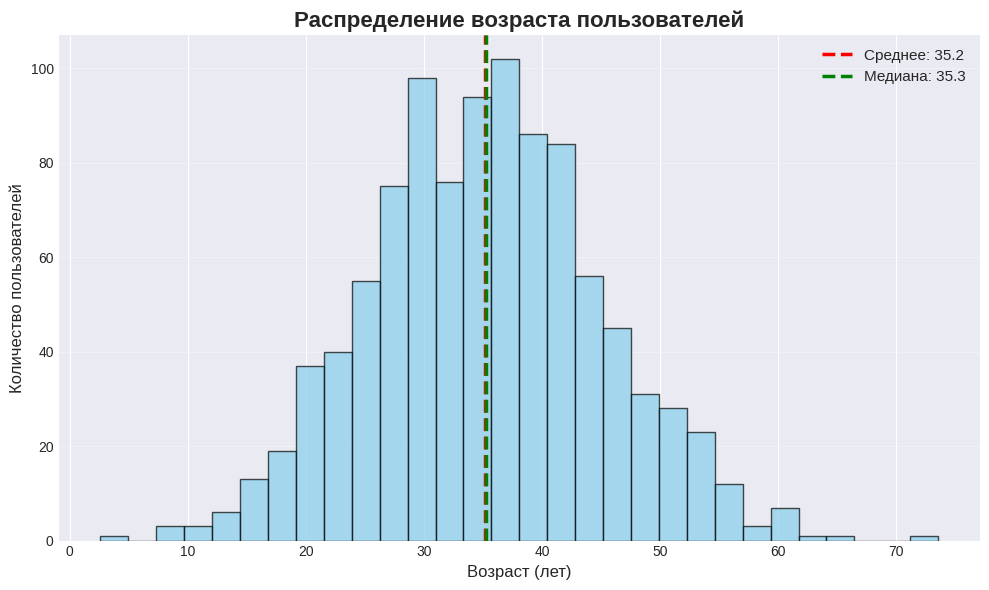

Среднее значение: 35.19
Медиана: 35.25
Стандартное отклонение: 9.79
Минимум: 2.59, Максимум: 73.53


In [8]:
# Генерируем случайные данные: возраст пользователей
np.random.seed(42)
ages = np.random.normal(35, 10, 1000)  # среднее=35, стандартное отклонение=10

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(ages, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Распределение возраста пользователей', fontsize=16, fontweight='bold')
plt.xlabel('Возраст (лет)', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)

# Добавляем статистические линии
mean_age = np.mean(ages)
median_age = np.median(ages)

plt.axvline(mean_age, color='red', linestyle='--', linewidth=2.5, label=f'Среднее: {mean_age:.1f}')
plt.axvline(median_age, color='green', linestyle='--', linewidth=2.5, label=f'Медиана: {median_age:.1f}')

plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Статистика
print(f"Среднее значение: {mean_age:.2f}")
print(f"Медиана: {median_age:.2f}")
print(f"Стандартное отклонение: {np.std(ages):.2f}")
print(f"Минимум: {np.min(ages):.2f}, Максимум: {np.max(ages):.2f}")

### Пример 6: Сравнение распределений (несколько гистограмм)

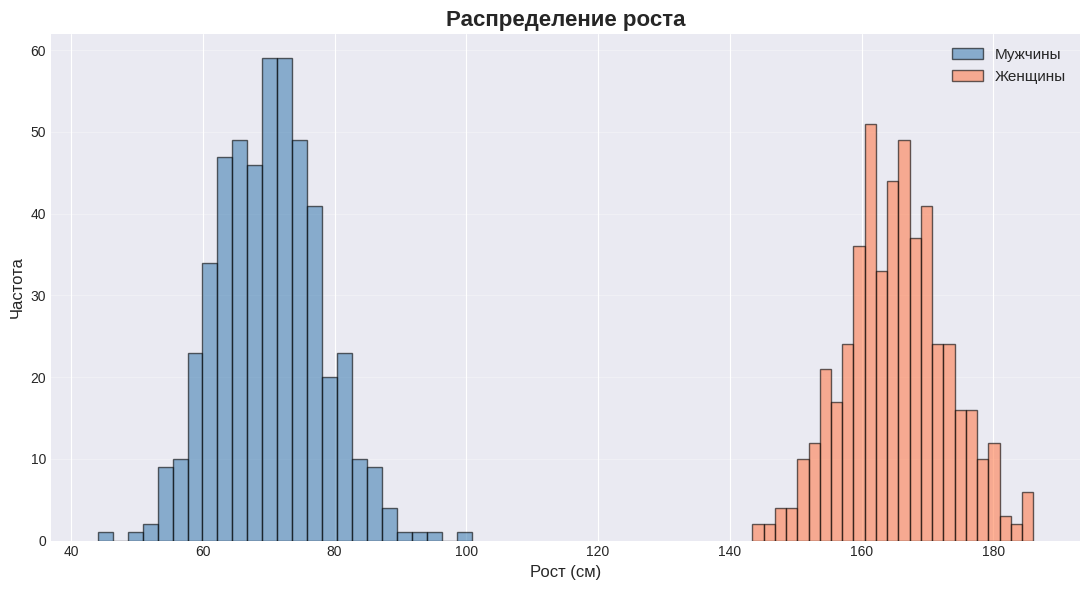

Средний рост мужчин: 70.1 см
Средний рост женщин: 165.3 см


In [9]:
# Генерируем данные для двух групп
np.random.seed(42)
group1 = np.random.normal(70, 8, 500)   # средний рост мужчин
group2 = np.random.normal(165, 8, 500)  # средний рост женщин

plt.figure(figsize=(11, 6))

plt.hist(group1, bins=25, alpha=0.6, color='steelblue', label='Мужчины', edgecolor='black')
plt.hist(group2, bins=25, alpha=0.6, color='coral', label='Женщины', edgecolor='black')

plt.title('Распределение роста', fontsize=16, fontweight='bold')
plt.xlabel('Рост (см)', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Средний рост мужчин: {np.mean(group1):.1f} см")
print(f"Средний рост женщин: {np.mean(group2):.1f} см")

## ✏️ ЗАДАНИЕ 1.4

Создайте гистограмму для оценок студентов (от 0 до 100):

**Требования:**
1. Сгенерируйте 500 оценок с нормальным распределением (среднее=72, отклонение=15)
2. Постройте гистограмму с разным количеством bins (10, 20, 50) в трех подграфиках
3. Добавьте вертикальные линии для среднего и медианы
4. Выведите статистику: среднее, медиана, минимум, максимум

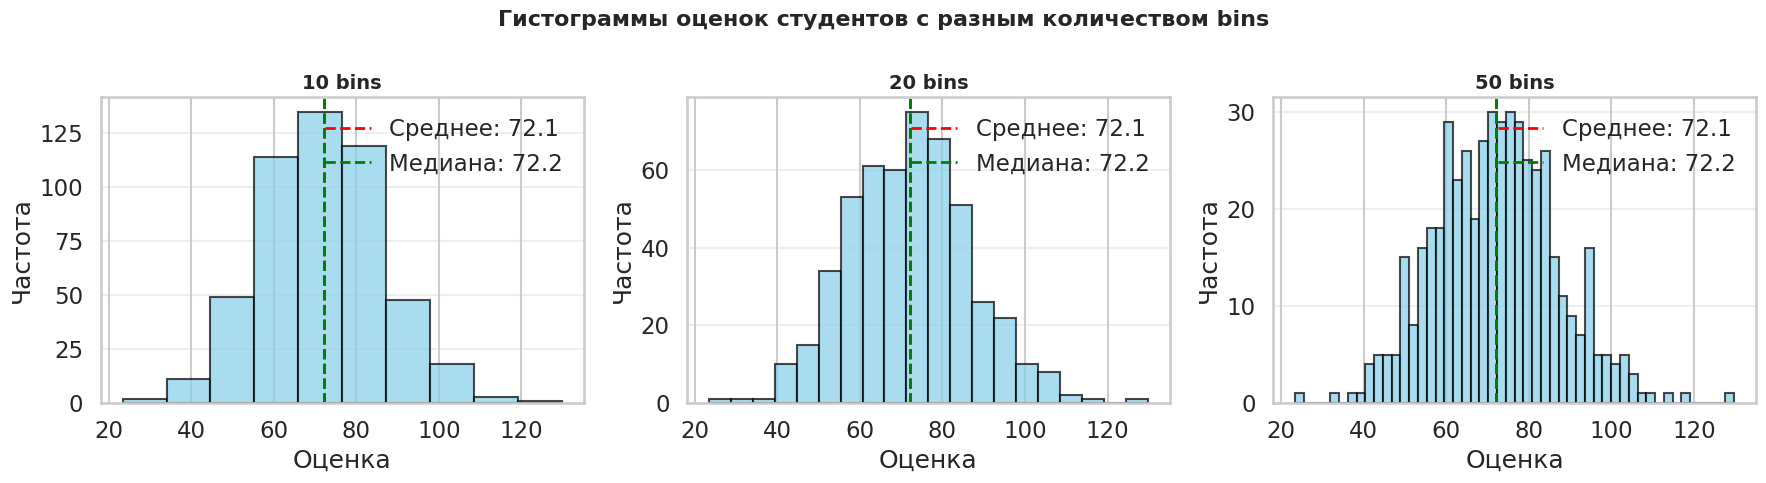

Статистика оценок студентов:
Среднее: 72.10
Медиана: 72.19
Стандартное отклонение: 14.70
Минимум: 23.38
Максимум: 129.79


In [50]:
np.random.seed(42)
scores = np.random.normal(72, 15, 500)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Гистограммы оценок студентов с разным количеством bins', fontsize=16, fontweight='bold')

bins_list = [10, 20, 50]
titles = ['10 bins', '20 bins', '50 bins']

for ax, bins, title in zip(axes, bins_list, titles):
    ax.hist(scores, bins=bins, color='skyblue', edgecolor='black', alpha=0.7)
    ax.axvline(np.mean(scores), color='red', linestyle='--', linewidth=2, label=f'Среднее: {np.mean(scores):.1f}')
    ax.axvline(np.median(scores), color='green', linestyle='--', linewidth=2, label=f'Медиана: {np.median(scores):.1f}')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Оценка')
    ax.set_ylabel('Частота')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Статистика оценок студентов:")
print(f"Среднее: {np.mean(scores):.2f}")
print(f"Медиана: {np.median(scores):.2f}")
print(f"Стандартное отклонение: {np.std(scores):.2f}")
print(f"Минимум: {np.min(scores):.2f}")
print(f"Максимум: {np.max(scores):.2f}")

---
## 1.5 Диаграммы рассеяния (Scatter plots)

### Когда использовать диаграммы рассеяния?
- **Связь между двумя переменными** (зависит ли Y от X?)
- **Поиск корреляций** (если X растет, Y тоже растет?)
- **Выявление выбросов** (точки, которые сильно отличаются)

### Как интерпретировать облако точек:
- **Облако вверх-вправо** → положительная корреляция
- **Облако вниз-вправо** → отрицательная корреляция
- **Хаотичное облако** → нет корреляции
- **Изолированные точки** → выбросы

### Пример 7: Простая диаграмма рассеяния

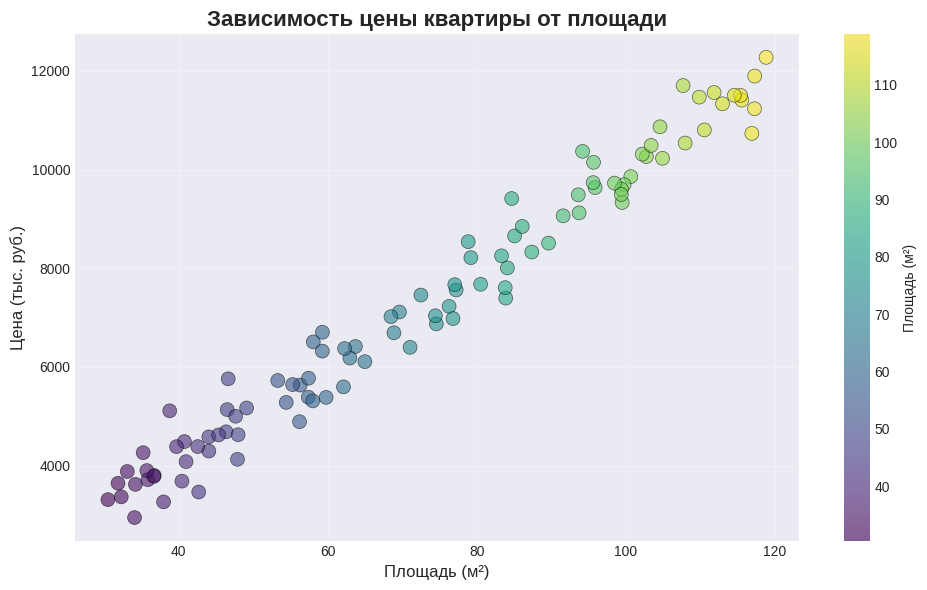

Корреляция между площадью и ценой: 0.985
Интерпретация: Сильная положительная связь


In [11]:
# Данные: площадь квартиры vs цена
np.random.seed(42)
area = np.random.uniform(30, 120, 100)
price = area * 100 + np.random.normal(0, 500, 100)  # цена ~ 100*площадь + шум

plt.figure(figsize=(10, 6))
plt.scatter(area, price, alpha=0.6, s=100, c=area, cmap='viridis', edgecolors='black', linewidth=0.5)

plt.title('Зависимость цены квартиры от площади', fontsize=16, fontweight='bold')
plt.xlabel('Площадь (м²)', fontsize=12)
plt.ylabel('Цена (тыс. руб.)', fontsize=12)

cbar = plt.colorbar(label='Площадь (м²)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Вычисляем корреляцию
correlation = np.corrcoef(area, price)[0, 1]
print(f"Корреляция между площадью и ценой: {correlation:.3f}")
print(f"Интерпретация: {'Сильная положительная связь' if correlation > 0.7 else 'Умеренная связь'}")

### Пример 8: Scatter plot с линией тренда

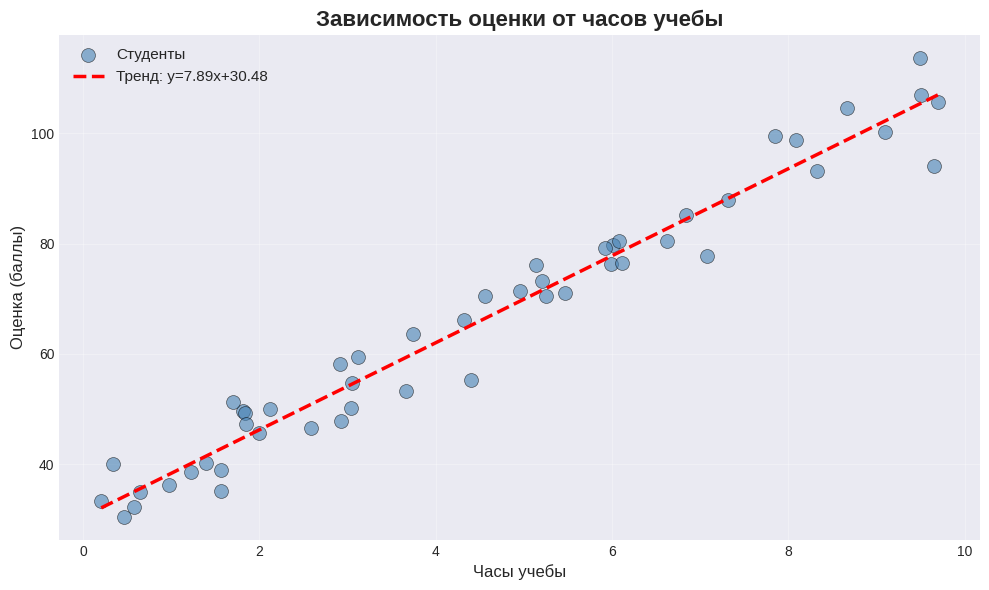

Уравнение тренда: оценка = 7.89 * часы + 30.48
Каждый дополнительный час учебы добавляет ~7.89 баллов


In [12]:
# Создаем данные: часы учебы vs оценка на экзамене
np.random.seed(42)
study_hours = np.random.uniform(0, 10, 50)
exam_score = study_hours * 8 + np.random.normal(30, 5, 50)

# Вычисляем линию тренда
z = np.polyfit(study_hours, exam_score, 1)  # линейное приближение
p = np.poly1d(z)
x_trend = np.linspace(study_hours.min(), study_hours.max(), 100)
y_trend = p(x_trend)

plt.figure(figsize=(10, 6))
plt.scatter(study_hours, exam_score, alpha=0.6, s=100, c='steelblue',
            edgecolors='black', linewidth=0.5, label='Студенты')
plt.plot(x_trend, y_trend, 'r--', linewidth=2.5, label=f'Тренд: y={z[0]:.2f}x+{z[1]:.2f}')

plt.title('Зависимость оценки от часов учебы', fontsize=16, fontweight='bold')
plt.xlabel('Часы учебы', fontsize=12)
plt.ylabel('Оценка (баллы)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Уравнение тренда: оценка = {z[0]:.2f} * часы + {z[1]:.2f}")
print(f"Каждый дополнительный час учебы добавляет ~{z[0]:.2f} баллов")

## ✏️ ЗАДАНИЕ 1.5

Создайте scatter plot с линией тренда:

**Требования:**
1. Используйте данные: часы в интернете (X) vs оценки в школе (Y)
   - Сгенерируйте 100 точек
   - Логика: больше интернета = ниже оценки
2. Измените размер точек в зависимости от третьего параметра (например, возраст)
3. Добавьте линию тренда
4. Вычислите и выведите корреляцию

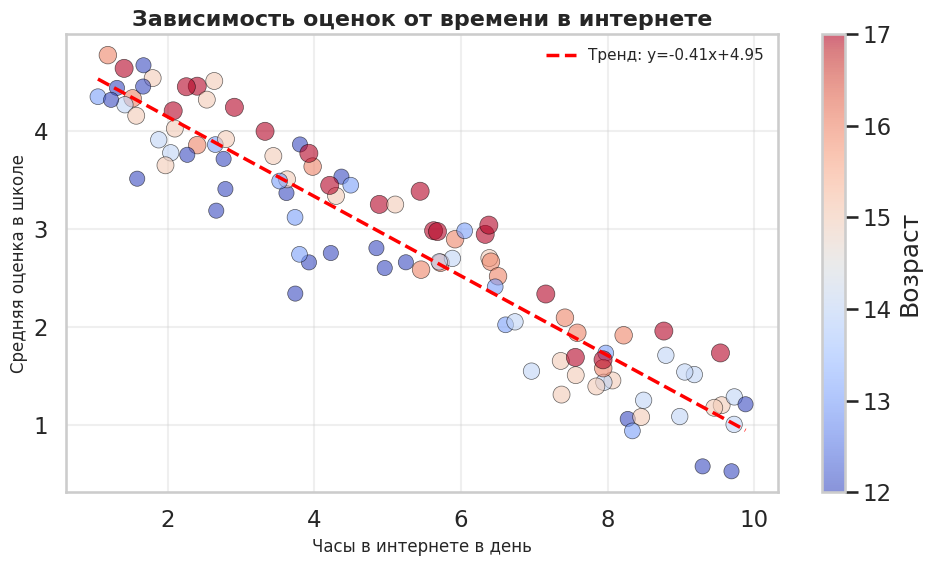

Корреляция между временем в интернете и оценками: -0.946
Интерпретация: Отрицательная корреляция - больше времени в интернете связано с более низкими оценками


In [51]:
np.random.seed(42)
internet_hours = np.random.uniform(1, 10, 100)
age = np.random.randint(12, 18, 100)
grades = 5 - 0.4 * internet_hours + np.random.normal(0, 0.3, 100) + (age - 15) * 0.1

z = np.polyfit(internet_hours, grades, 1)
p = np.poly1d(z)
x_trend = np.linspace(internet_hours.min(), internet_hours.max(), 100)
y_trend = p(x_trend)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(internet_hours, grades, s=age*10, c=age, cmap='coolwarm',
                      alpha=0.6, edgecolors='black', linewidth=0.5)
plt.plot(x_trend, y_trend, 'r--', linewidth=2.5, label=f'Тренд: y={z[0]:.2f}x+{z[1]:.2f}')
plt.title('Зависимость оценок от времени в интернете', fontsize=16, fontweight='bold')
plt.xlabel('Часы в интернете в день', fontsize=12)
plt.ylabel('Средняя оценка в школе', fontsize=12)
plt.colorbar(scatter, label='Возраст')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

correlation = np.corrcoef(internet_hours, grades)[0, 1]
print(f"Корреляция между временем в интернете и оценками: {correlation:.3f}")
print("Интерпретация: Отрицательная корреляция - больше времени в интернете связано с более низкими оценками")

---
## 1.6 Подграфики (Subplots)

### Зачем нужны подграфики?
- **Сравнение нескольких графиков** рядом
- **Компактное представление** информации
- **Разные аспекты одних данных** в одной фигуре

### Пример 9: Сетка подграфиков (2x2)

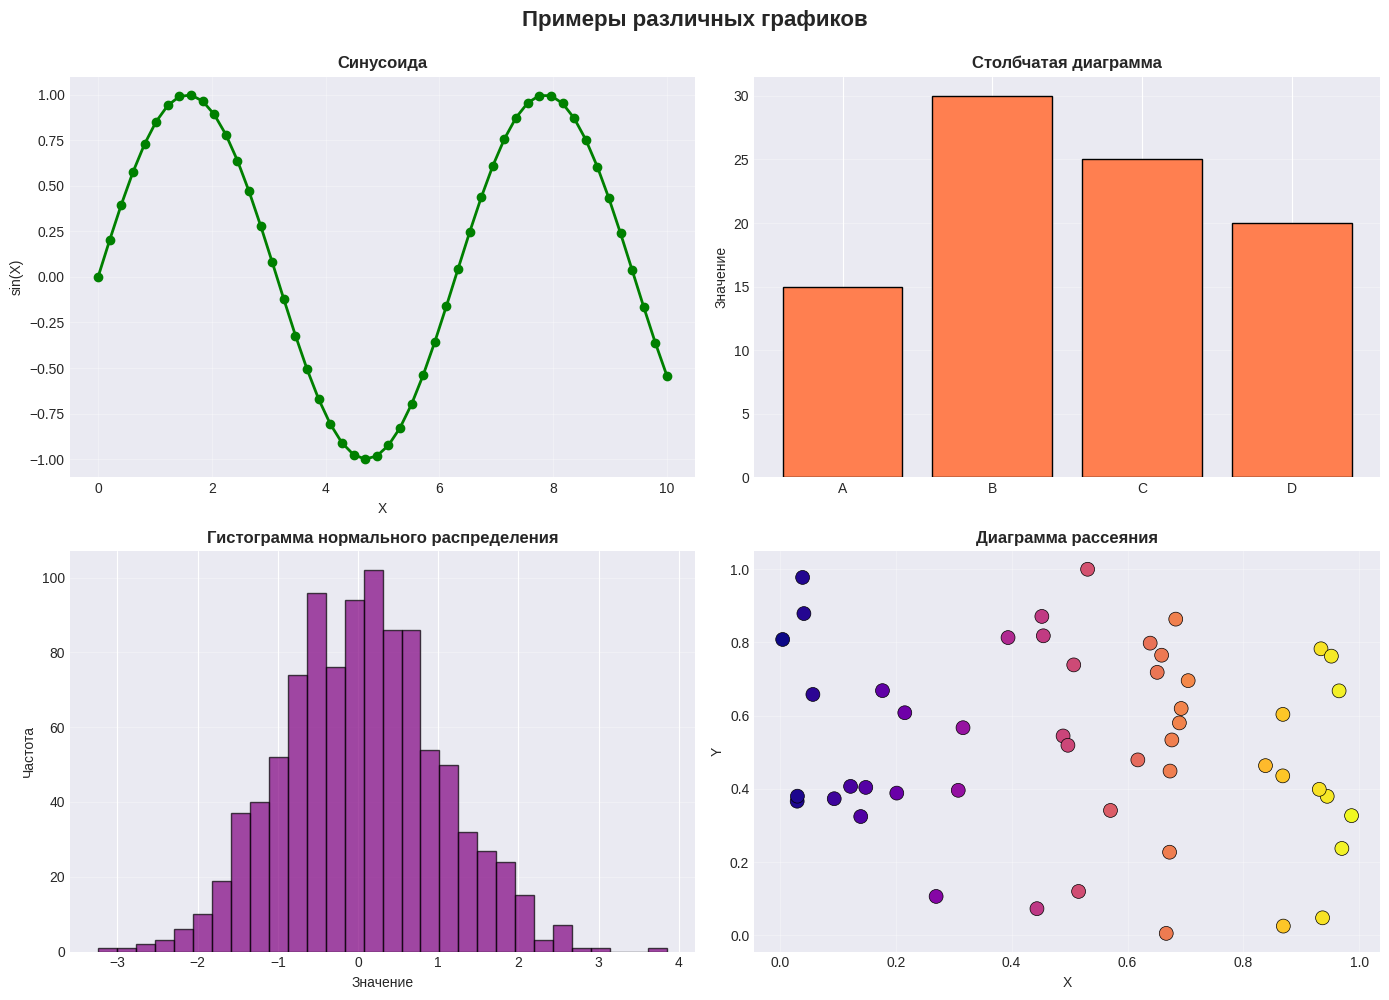

In [14]:
# Создаем фигуру с 2х2 подграфиками
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# График 1: Линейный график
x = np.linspace(0, 10, 50)
axes[0, 0].plot(x, np.sin(x), 'g-o', linewidth=2)
axes[0, 0].set_title('Синусоида', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('X')
axes[0, 0].set_ylabel('sin(X)')
axes[0, 0].grid(True, alpha=0.3)

# График 2: Столбчатая диаграмма
categories = ['A', 'B', 'C', 'D']
values = [15, 30, 25, 20]
axes[0, 1].bar(categories, values, color='coral', edgecolor='black')
axes[0, 1].set_title('Столбчатая диаграмма', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Значение')
axes[0, 1].grid(axis='y', alpha=0.3)

# График 3: Гистограмма
data = np.random.randn(1000)
axes[1, 0].hist(data, bins=30, color='purple', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Гистограмма нормального распределения', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Значение')
axes[1, 0].set_ylabel('Частота')
axes[1, 0].grid(axis='y', alpha=0.3)

# График 4: Диаграмма рассеяния
x_scatter = np.random.rand(50)
y_scatter = np.random.rand(50)
axes[1, 1].scatter(x_scatter, y_scatter, c=x_scatter, cmap='plasma', s=100, edgecolor='black', linewidth=0.5)
axes[1, 1].set_title('Диаграмма рассеяния', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('X')
axes[1, 1].set_ylabel('Y')
axes[1, 1].grid(True, alpha=0.3)

# Общий заголовок
fig.suptitle('Примеры различных графиков', fontsize=16, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()

## ✏️ ЗАДАНИЕ 1.6

Создайте дашборд (2×2 subplot) для анализа данных о продажах:

**Требования:**
1. **График 1** (верхний левый): Линейный график продаж по месяцам
2. **График 2** (верхний правый): Bar plot продаж по категориям товаров
3. **График 3** (нижний левый): Histogram распределения сумм чеков
4. **График 4** (нижний правый): Scatter plot количество товаров vs сумма чека

**Совет:** Сгенерируйте или придумайте данные для каждого графика

In [15]:
np.random.seed(42)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Дашборд анализа продаж', fontsize=16, fontweight='bold', y=0.98)

months = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']
sales = [150, 180, 175, 220, 240, 260, 250, 270, 280, 300, 320, 350]
axes[0, 0].plot(months, sales, marker='o', color='blue', linewidth=2)
axes[0, 0].set_title('Продажи по месяцам', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Месяц')
axes[0, 0].set_ylabel('Продажи (тыс. руб.)')
axes[0, 0].grid(True, alpha=0.3)

categories = ['Электроника', 'Одежда', 'Продукты', 'Книги', 'Косметика']
category_sales = [450, 320, 280, 150, 200]
axes[0, 1].bar(categories, category_sales, color='steelblue', edgecolor='black')
axes[0, 1].set_title('Продажи по категориям', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Продажи (тыс. руб.)')
axes[0, 1].grid(axis='y', alpha=0.3)

receipts = np.random.normal(2500, 800, 1000)
axes[1, 0].hist(receipts, bins=30, color='green', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Распределение сумм чеков', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Сумма чека (руб.)')
axes[1, 0].set_ylabel('Частота')
axes[1, 0].grid(axis='y', alpha=0.3)

items_count = np.random.randint(1, 20, 100)
receipt_amount = items_count * 150 + np.random.normal(0, 100, 100)
axes[1, 1].scatter(items_count, receipt_amount, alpha=0.6, color='purple', s=50)
axes[1, 1].set_title('Количество товаров vs Сумма чека', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Количество товаров в чеке')
axes[1, 1].set_ylabel('Сумма чека (руб.)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
# 🎯 ЧАСТЬ 2: SEABORN И ИНТЕРАКТИВНОСТЬ
---

## 2.1 Введение в Seaborn

### Почему Seaborn?
- **Красивые графики "из коробки"** — не нужно настраивать каждый параметр
- **Встроенная работа с pandas DataFrame** — напрямую передаете таблицы
- **Статистические визуализации** — автоматические вычисления доверительных интервалов
- **Удобные цветовые палитры** — красиво раскрашивает по умолчанию
- **Легче обработка "больших данных"** — работает с категориальными переменными

### Загрузка встроенных данных

In [16]:
# Загружаем датасет о чаевых
tips = sns.load_dataset('tips')

print("Первые 10 строк:")
print(tips.head(10))

print("\nИнформация о датасете:")
print(f"Размер: {tips.shape}")
print(f"Колонки: {tips.columns.tolist()}")
print(f"\nОписательная статистика:")
print(tips.describe())

Первые 10 строк:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2

Информация о датасете:
Размер: (244, 7)
Колонки: ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

Описательная статистика:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000

## 2.2 Box plots и Violin plots

### Что показывает Box plot?
```
      Максимум (или Q3 + 1.5*IQR)
           |
    +------+------+
    |  75% |  |   |  Верхняя четверть (Q3)
    |  50% |--|   |  Медиана
    |  25% |  |   |  Нижняя четверть (Q1)
    +------+------+
           |
      Минимум (или Q1 - 1.5*IQR)
      
o, o         — выбросы
```

### Violin plot = Box plot + распределение
- Показывает не только квартили, но и полное распределение
- Ширина = плотность значений

### Пример 10: Box plot

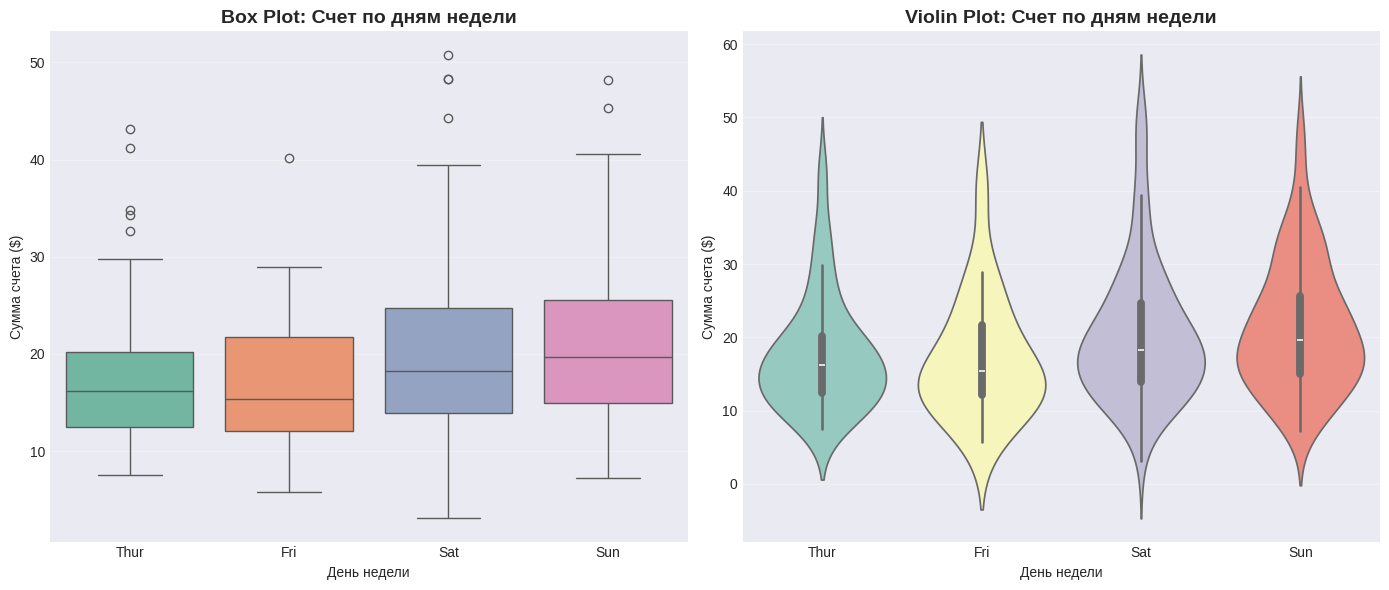

Статистика по дням:
      count       mean       std   min      25%    50%      75%    max
day                                                                   
Thur   62.0  17.682742  7.886170  7.51  12.4425  16.20  20.1550  43.11
Fri    19.0  17.151579  8.302660  5.75  12.0950  15.38  21.7500  40.17
Sat    87.0  20.441379  9.480419  3.07  13.9050  18.24  24.7400  50.81
Sun    76.0  21.410000  8.832122  7.25  14.9875  19.63  25.5975  48.17


In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot: Счет по дням недели
sns.boxplot(data=tips, x='day', y='total_bill', ax=axes[0], palette='Set2')
axes[0].set_title('Box Plot: Счет по дням недели', fontsize=14, fontweight='bold')
axes[0].set_xlabel('День недели')
axes[0].set_ylabel('Сумма счета ($)')
axes[0].grid(axis='y', alpha=0.3)

# Violin plot: Счет по дням недели
sns.violinplot(data=tips, x='day', y='total_bill', ax=axes[1], palette='Set3')
axes[1].set_title('Violin Plot: Счет по дням недели', fontsize=14, fontweight='bold')
axes[1].set_xlabel('День недели')
axes[1].set_ylabel('Сумма счета ($)')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Анализ
print("Статистика по дням:")
print(tips.groupby('day')['total_bill'].describe())

### Пример 11: Box plot с hue (разделение по категориям)

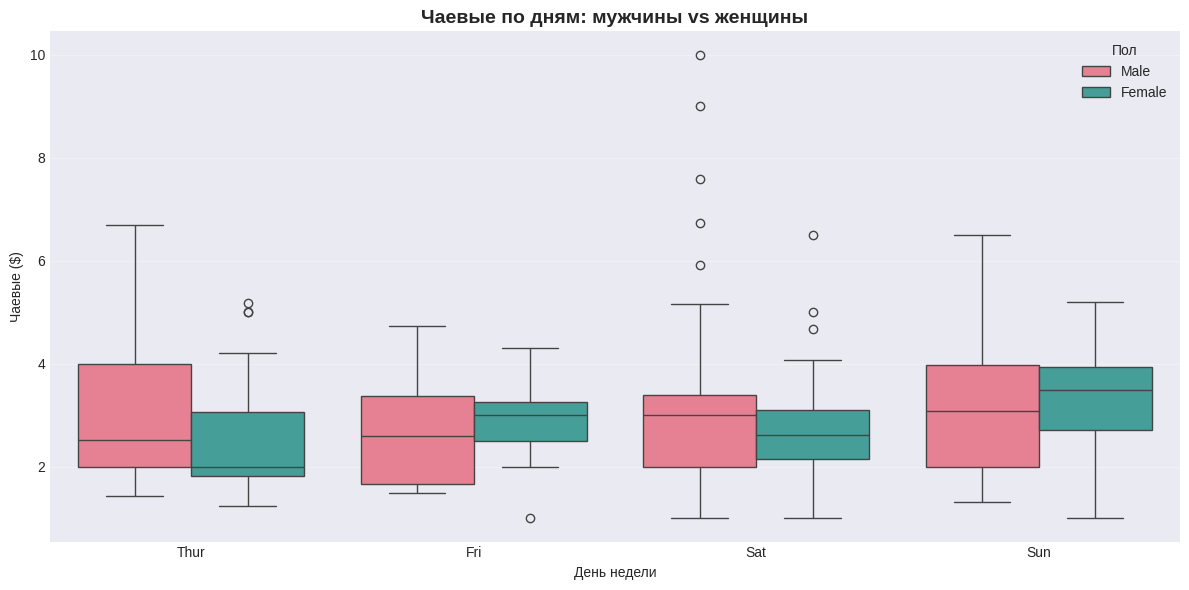

Средние чаевые:
day   sex   
Thur  Male      2.980333
      Female    2.575625
Fri   Male      2.693000
      Female    2.781111
Sat   Male      3.083898
      Female    2.801786
Sun   Male      3.220345
      Female    3.367222
Name: tip, dtype: float64


In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=tips, x='day', y='tip', hue='sex', palette='husl')
plt.title('Чаевые по дням: мужчины vs женщины', fontsize=14, fontweight='bold')
plt.xlabel('День недели')
plt.ylabel('Чаевые ($)')
plt.legend(title='Пол', loc='upper right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Анализ
print("Средние чаевые:")
print(tips.groupby(['day', 'sex'])['tip'].mean())

## ✏️ ЗАДАНИЕ 2.2

Используя датасет `tips`:

**Требования:**
1. Создайте box plot для сравнения чаевых (tip) между мужчинами и женщинами
2. Добавьте hue для разделения по времени дня (lunch/dinner)
3. Сделайте второй графика: violin plot с тем же разбиением
4. Выведите среднее значение чаевых для каждой группы

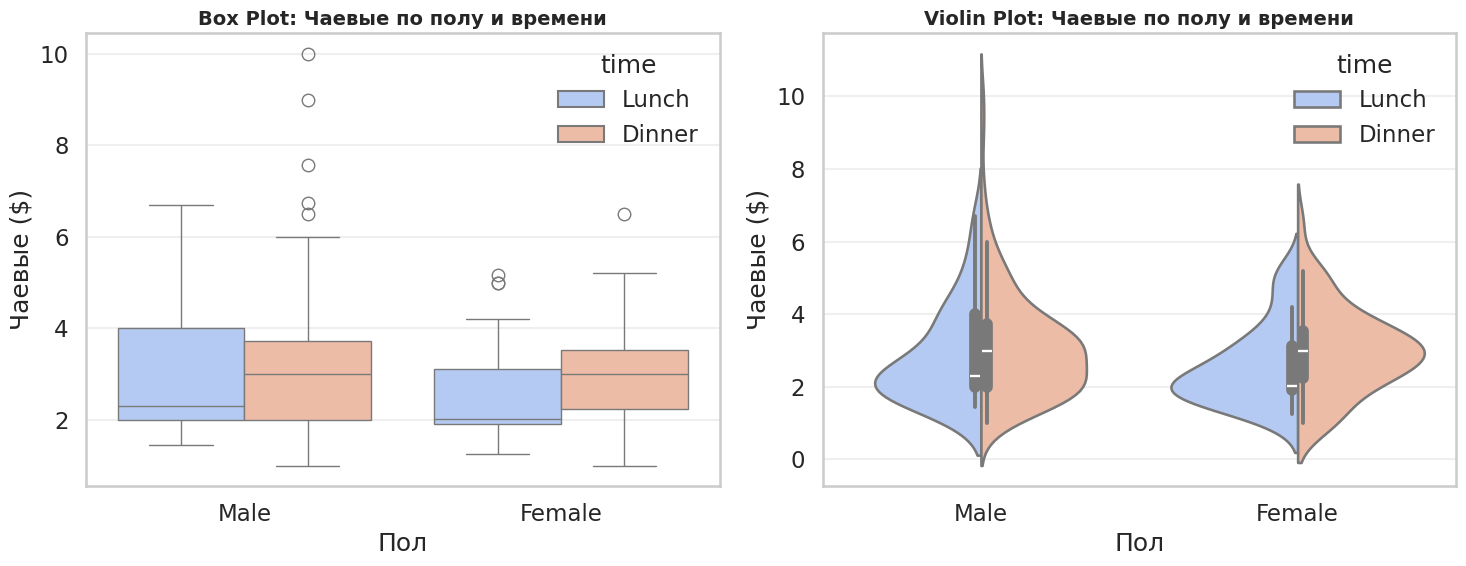

Средние чаевые по группам:
sex     time  
Male    Lunch     2.882121
        Dinner    3.144839
Female  Lunch     2.582857
        Dinner    3.002115
Name: tip, dtype: float64


In [52]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(data=tips, x='sex', y='tip', hue='time', palette='coolwarm', ax=axes[0])
axes[0].set_title('Box Plot: Чаевые по полу и времени', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Пол')
axes[0].set_ylabel('Чаевые ($)')
axes[0].grid(axis='y', alpha=0.3)

sns.violinplot(data=tips, x='sex', y='tip', hue='time', palette='coolwarm', split=True, ax=axes[1])
axes[1].set_title('Violin Plot: Чаевые по полу и времени', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Пол')
axes[1].set_ylabel('Чаевые ($)')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("Средние чаевые по группам:")
print(tips.groupby(['sex', 'time'])['tip'].mean())

---
## 2.3 Тепловые карты (Heatmaps)

### Когда использовать тепловые карты?
- **Корреляции между переменными** (какие переменные связаны?)
- **Таблицы сопряженности** (сколько мужчин/женщин каждого возраста?)
- **Матрицы расстояний** (дистанции между объектами)

### Цветовая схема:
- **Светлые цвета** = низкие значения
- **Темные цвета** = высокие значения
- **Параметр `center`** = значение, при котором меняется цвет (часто используется для корреляций)

### Пример 12: Матрица корреляций

Матрица корреляций:
            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


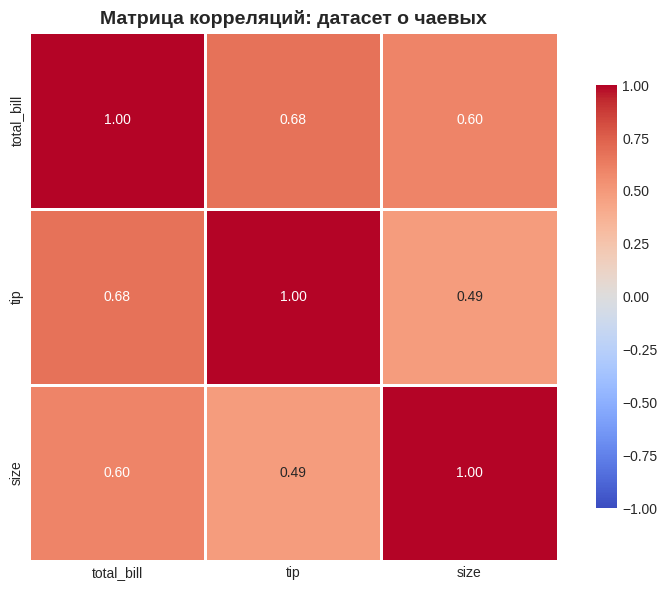

In [20]:
# Вычисляем матрицу корреляций
correlation = tips.corr(numeric_only=True)
print("Матрица корреляций:")
print(correlation)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            fmt='.2f', vmin=-1, vmax=1)
plt.title('Матрица корреляций: датасет о чаевых', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Пример 13: Тепловая карта для Pivot Table

Pivot Table (среднее значение счета):
time      Lunch     Dinner
day                       
Thur  17.664754  18.780000
Fri   12.845714  19.663333
Sat         NaN  20.441379
Sun         NaN  21.410000


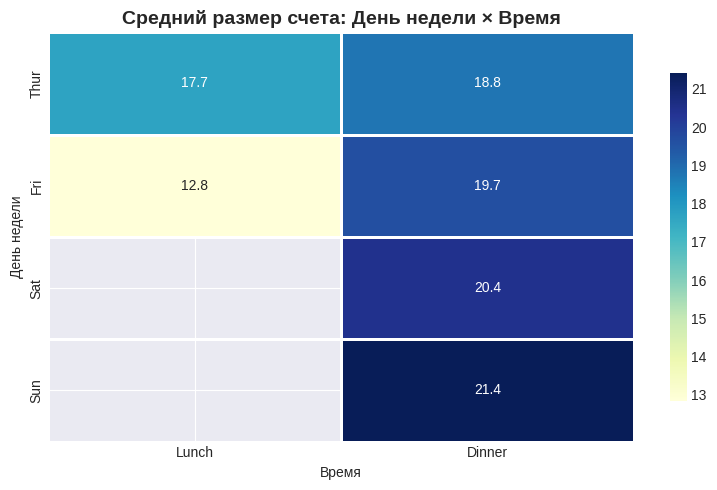

In [21]:
# Создаем pivot table: средний счет по дням и времени
pivot_table = tips.pivot_table(values='total_bill', index='day', columns='time', aggfunc='mean')
print("Pivot Table (среднее значение счета):")
print(pivot_table)

plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', linewidths=1,
            cbar_kws={"shrink": 0.8}, fmt='.1f')
plt.title('Средний размер счета: День недели × Время', fontsize=14, fontweight='bold')
plt.ylabel('День недели')
plt.xlabel('Время')
plt.tight_layout()
plt.show()

## ✏️ ЗАДАНИЕ 2.3

**Требования:**
1. Создайте pivot table: среднее значение чаевых (tip) по дням (day) и поло (sex)
2. Постройте heatmap для этой таблицы
3. Измените цветовую палитру на 'RdYlGn'
4. Добавьте значения в ячейки с 1 знаком после запятой

Pivot Table: средние чаевые по дням и полу:
sex       Male    Female
day                     
Thur  2.980333  2.575625
Fri   2.693000  2.781111
Sat   3.083898  2.801786
Sun   3.220345  3.367222


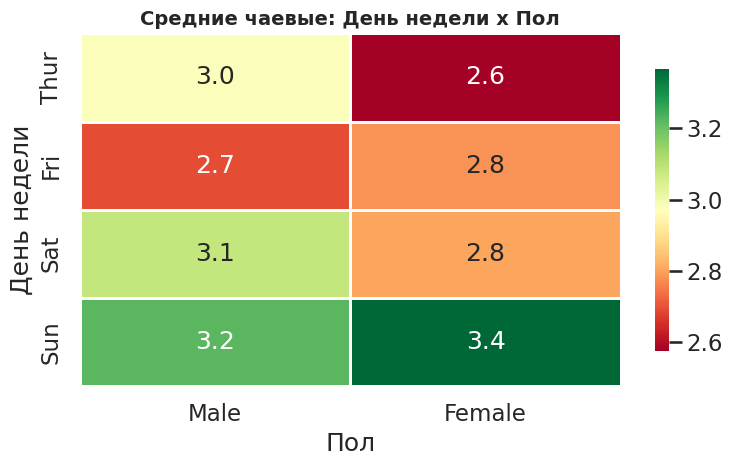

In [54]:
pivot_table_tip = tips.pivot_table(values='tip', index='day', columns='sex', aggfunc='mean')
print("Pivot Table: средние чаевые по дням и полу:")
print(pivot_table_tip)

plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table_tip, annot=True, cmap='RdYlGn', linewidths=1,
            cbar_kws={"shrink": 0.8}, fmt='.1f')
plt.title('Средние чаевые: День недели x Пол', fontsize=14, fontweight='bold')
plt.ylabel('День недели')
plt.xlabel('Пол')
plt.tight_layout()
plt.show()

---
## 2.4 Pair plots

### Что такое Pair plot?
- **Все переменные против всех** — полный обзор взаимосвязей
- **Диагональ** = распределение каждой переменной (гистограмма или KDE)
- **Остальные ячейки** = scatter plots между переменными
- **Быстрый способ** исследовать новые данные (EDA)

### Параметры:
- `hue='column'` — раскрашивает по категориальной переменной
- `diag_kind='kde'` — использует плотность вместо гистограммы
- `height` — размер каждого подграфика

### Пример 14: Pair plot

Датасет Iris:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


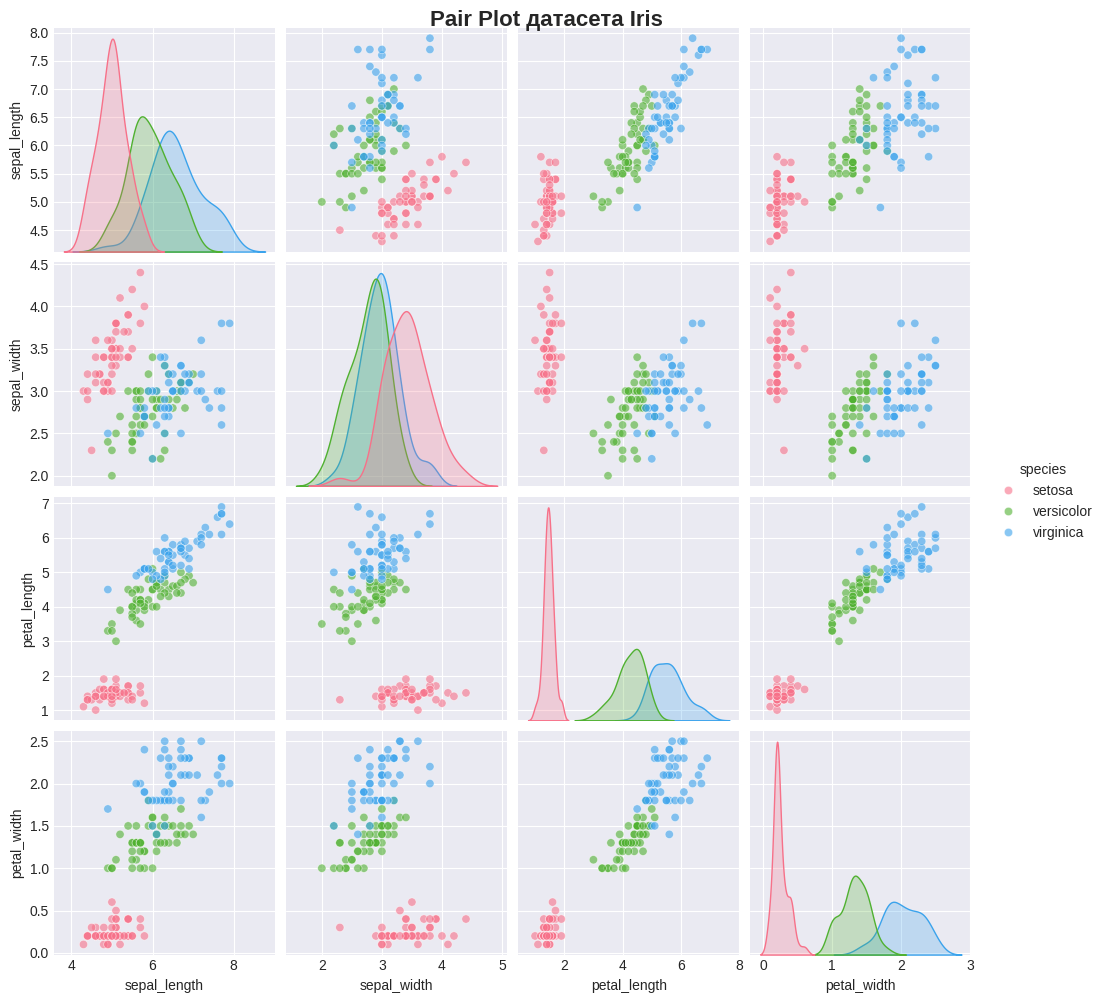

In [23]:
# Загружаем датасет Iris
iris = sns.load_dataset('iris')
print("Датасет Iris:")
print(iris.head())

# Создаем pair plot
g = sns.pairplot(iris, hue='species', palette='husl', diag_kind='kde',
                  plot_kws={'alpha': 0.6}, height=2.5)
g.fig.suptitle('Pair Plot датасета Iris', fontsize=16, fontweight='bold', y=1.00)
plt.show()

### Пример 15: Joint plot (для одной пары переменных)

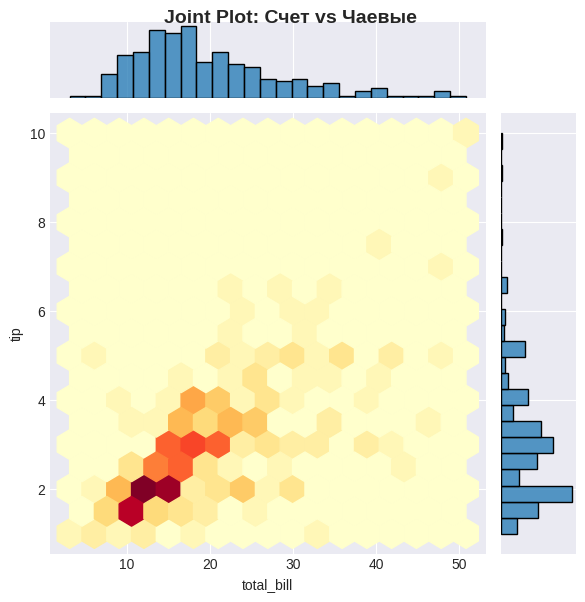


Корреляция между счетом и чаевыми: 0.676


In [24]:
# Детальный анализ двух переменных
g = sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex', height=6,
                  marginal_kws=dict(bins=25, fill=True), cmap='YlOrRd')
g.fig.suptitle('Joint Plot: Счет vs Чаевые', fontsize=14, fontweight='bold', y=0.995)
plt.show()

# Корреляция
corr = tips['total_bill'].corr(tips['tip'])
print(f"\nКорреляция между счетом и чаевыми: {corr:.3f}")

## ✏️ ЗАДАНИЕ 2.4

Загрузите датасет Iris и создайте:

**Требования:**
1. Pair plot с разделением по видам (species)
2. Используйте разные палитры цветов
3. Выведите максимальное и минимальное значения для каждого признака

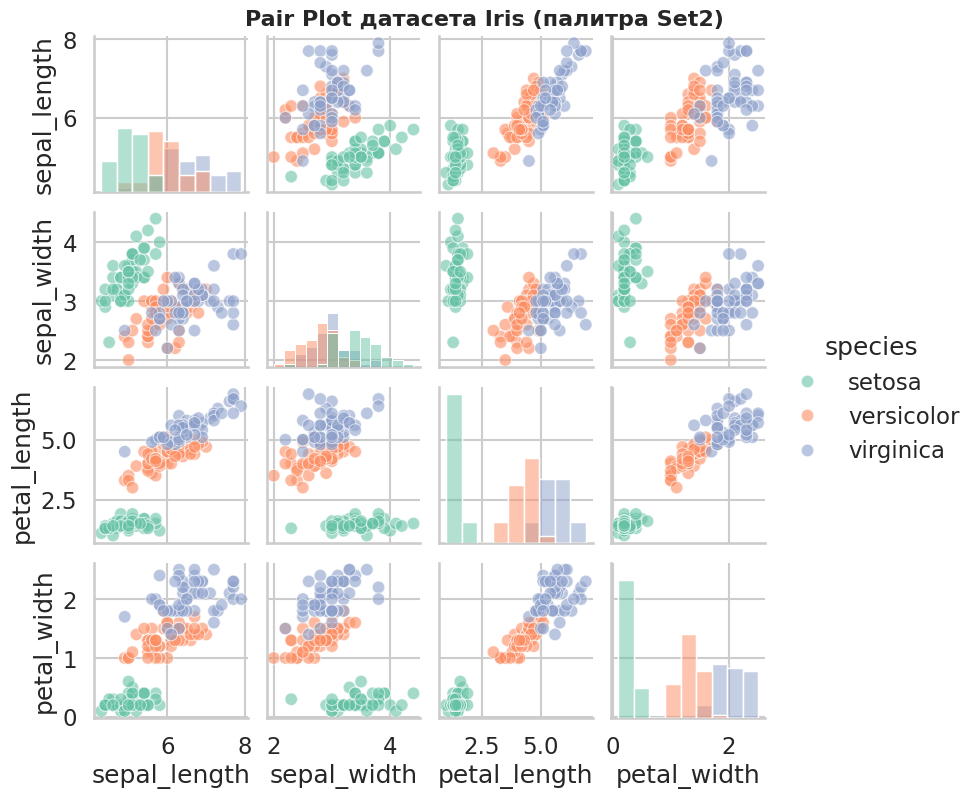

Минимальные и максимальные значения для каждого признака:
sepal_length: min=4.30, max=7.90
sepal_width: min=2.00, max=4.40
petal_length: min=1.00, max=6.90
petal_width: min=0.10, max=2.50


In [55]:
g = sns.pairplot(iris, hue='species', palette='Set2', diag_kind='hist',
                  plot_kws={'alpha': 0.6}, height=2)
g.fig.suptitle('Pair Plot датасета Iris (палитра Set2)', fontsize=16, fontweight='bold', y=1.00)
plt.show()

print("Минимальные и максимальные значения для каждого признака:")
for column in iris.columns[:-1]:
    print(f"{column}: min={iris[column].min():.2f}, max={iris[column].max():.2f}")

---
## 2.5 Count plots и Cat plots

### Для категориальных данных

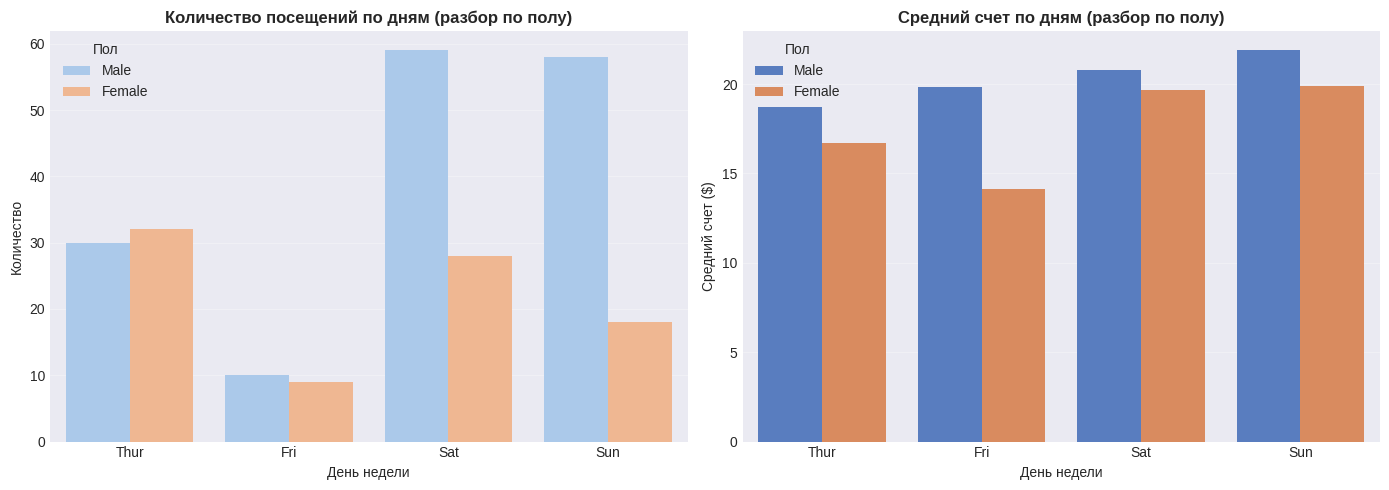

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot: Количество посещений по дням
sns.countplot(data=tips, x='day', hue='sex', palette='pastel', ax=axes[0])
axes[0].set_title('Количество посещений по дням (разбор по полу)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('День недели')
axes[0].set_ylabel('Количество')
axes[0].legend(title='Пол')
axes[0].grid(axis='y', alpha=0.3)

# Cat plot в виде bar
tips_grouped = tips.groupby(['day', 'sex'])['total_bill'].mean().reset_index()
sns.barplot(data=tips_grouped, x='day', y='total_bill', hue='sex', palette='muted', ax=axes[1])
axes[1].set_title('Средний счет по дням (разбор по полу)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('День недели')
axes[1].set_ylabel('Средний счет ($)')
axes[1].legend(title='Пол')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## ✏️ ЗАДАНИЕ 2.5

Используя датасет `tips`:

**Требования:**
1. Создайте count plot для распределения курящих/некурящих (smoker) по времени дня (time)
2. Добавьте разделение по полу (hue='sex')
3. Выведите количество наблюдений в каждой группе

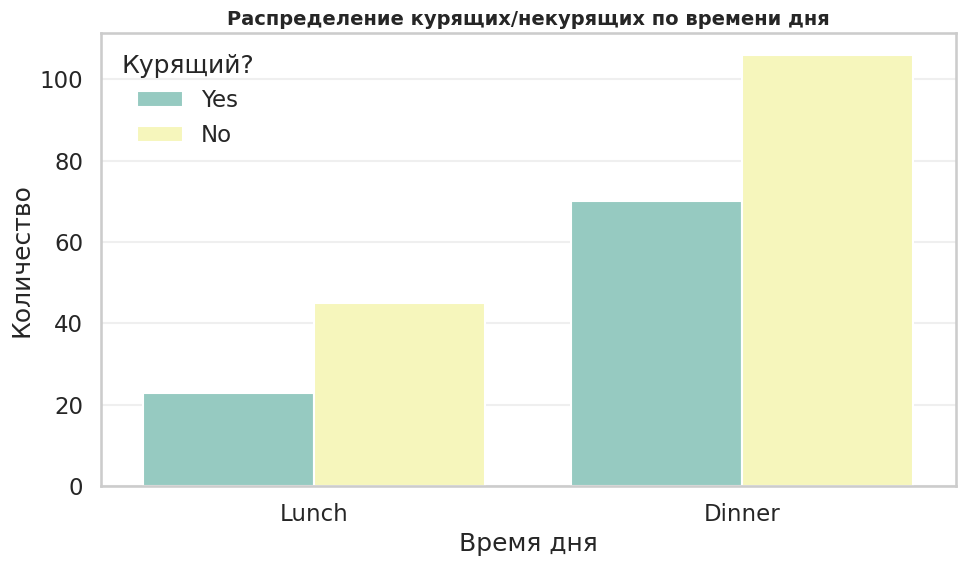

Количество наблюдений по группам:
time    smoker
Lunch   Yes        23
        No         45
Dinner  Yes        70
        No        106
dtype: int64


In [56]:
plt.figure(figsize=(10, 6))
sns.countplot(data=tips, x='time', hue='smoker', palette='Set3')
plt.title('Распределение курящих/некурящих по времени дня', fontsize=14, fontweight='bold')
plt.xlabel('Время дня')
plt.ylabel('Количество')
plt.legend(title='Курящий?')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Количество наблюдений по группам:")
print(tips.groupby(['time', 'smoker']).size())

🚭🚭🚭🚭🚭🚭🚭🚭🚭🚭🚭🚭🚭🚭🚭🚭🚭🚭🚭🚭🚭

---
## 2.6 Регрессионные графики

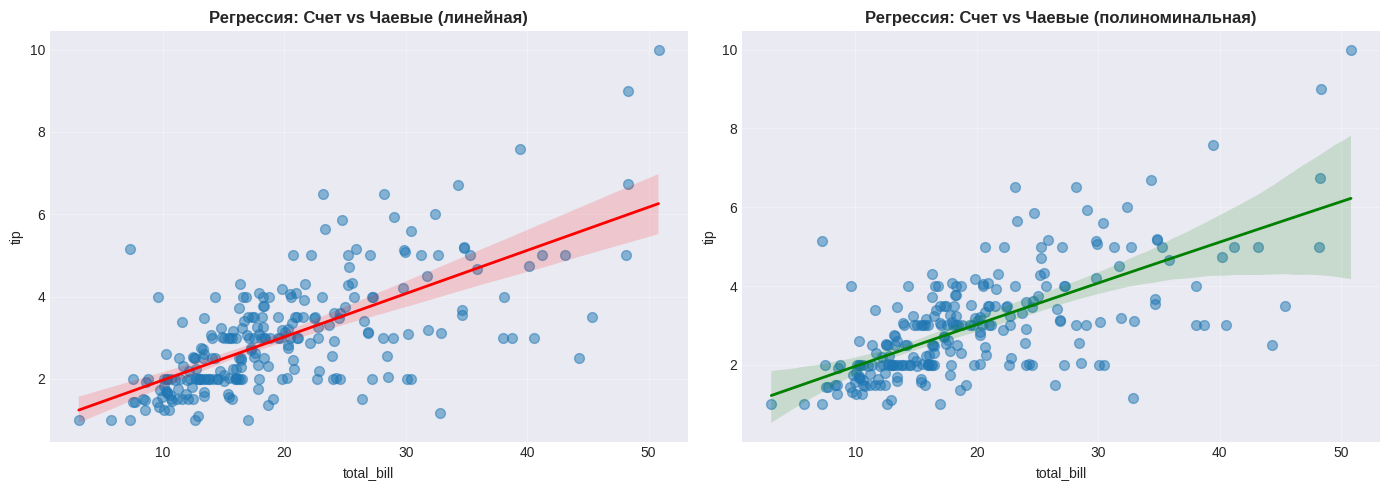

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Regplot с линейной регрессией
sns.regplot(data=tips, x='total_bill', y='tip', ax=axes[0],
            scatter_kws={'alpha': 0.5, 's': 50},
            line_kws={'color': 'red', 'linewidth': 2})
axes[0].set_title('Регрессия: Счет vs Чаевые (линейная)', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Lmplot с разделением по категориям
sns.regplot(data=tips, x='total_bill', y='tip', ax=axes[1],
            scatter_kws={'alpha': 0.5, 's': 50},
            line_kws={'color': 'green', 'linewidth': 2},
            order=2)  # полиномиальная регрессия 2-го порядка
axes[1].set_title('Регрессия: Счет vs Чаевые (полиноминальная)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
## 2.7 Интерактивные графики с Plotly

### Преимущества Plotly:
- **Интерактивность**: zoom, pan, hover
- **HTML экспорт**: легко делиться графиками
- **Подходит для дашбордов**: быстро создавать интерфейсы
- **Красивые анимации**: динамические визуализации

In [29]:
# Установка, если еще не установлена
# !pip install plotly

In [30]:
import plotly.express as px

# Интерактивный scatter plot
fig = px.scatter(tips, x='total_bill', y='tip', color='time', size='size',
                 hover_data=['day', 'sex'],
                 title='Интерактивный график: Счет vs Чаевые',
                 labels={'total_bill': 'Сумма счета ($)', 'tip': 'Чаевые ($)', 'size': 'Размер группы'})
fig.update_traces(marker=dict(line=dict(width=1, color='white')))
fig.show()

### Пример 16: Интерактивный линейный график

In [31]:
# Создаем временные данные
dates = pd.date_range('2024-01-01', periods=100)
np.random.seed(42)
values = np.cumsum(np.random.randn(100)) + 50

df_time = pd.DataFrame({
    'Дата': dates,
    'Значение': values
})

fig = px.line(df_time, x='Дата', y='Значение',
              title='Интерактивный временной ряд',
              labels={'Значение': 'Показатель'})
fig.update_traces(line_color='steelblue', line_width=2)
fig.show()

### Пример 17: Интерактивный bar chart

In [32]:
# Подготавливаем данные
avg_tip_by_day = tips.groupby('day')['tip'].mean().reset_index()
avg_tip_by_day = avg_tip_by_day.sort_values('tip', ascending=False)

fig = px.bar(avg_tip_by_day, x='day', y='tip',
             title='Средние чаевые по дням недели',
             labels={'day': 'День', 'tip': 'Средние чаевые ($)'},
             color='tip',
             color_continuous_scale='Viridis')
fig.update_layout(showlegend=False)
fig.show()

### Пример 18: Интерактивный box plot

In [33]:
fig = px.box(tips, x='day', y='total_bill', color='sex',
            title='Box Plot: Счет по дням и полу',
            labels={'day': 'День', 'total_bill': 'Сумма счета ($)', 'sex': 'Пол'})
fig.show()

## ✏️ ЗАДАНИЕ 2.7

**Требования:**
1. Создайте интерактивный scatter plot для датасета tips (счет vs чаевые)
2. Раскрасьте точки по времени (lunch/dinner)
3. Создайте интерактивный bar chart: среднее значение счета по дням
4. Создайте интерактивный box plot: распределение чаевых по полу

In [57]:
fig1 = px.scatter(tips, x='total_bill', y='tip', color='time',
                  hover_data=['day', 'sex', 'smoker'],
                  title='Интерактивный Scatter Plot: Счет vs Чаевые',
                  labels={'total_bill': 'Сумма счета ($)', 'tip': 'Чаевые ($)', 'time': 'Время'})
fig1.show()

avg_bill_by_day = tips.groupby('day')['total_bill'].mean().reset_index()
fig2 = px.bar(avg_bill_by_day, x='day', y='total_bill',
              title='Средний счет по дням недели',
              labels={'day': 'День', 'total_bill': 'Средний счет ($)'},
              color='total_bill',
              color_continuous_scale='Blues')
fig2.show()

fig3 = px.box(tips, x='sex', y='tip',
              title='Распределение чаевых по полу',
              labels={'sex': 'Пол', 'tip': 'Чаевые ($)'})
fig3.show()

---
## 2.8 Интерактивные виджеты с ipywidgets

In [35]:
# Установка, если еще не установлена
# !pip install ipywidgets

from ipywidgets import interact, IntSlider, FloatSlider, Dropdown
import plotly.graph_objects as go

### Пример 19: Интерактивные слайдеры

In [36]:
def plot_sine(frequency, amplitude):
    x = np.linspace(0, 10, 500)
    y = amplitude * np.sin(frequency * x)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines',
                            line=dict(color='steelblue', width=2)))
    fig.update_layout(
        title=f'Синусоида: freq={frequency}, amp={amplitude}',
        xaxis_title='X',
        yaxis_title='sin(X)',
        height=500
    )
    fig.show()

# Создаем интерактивные слайдеры
interact(plot_sine,
         frequency=IntSlider(min=1, max=5, step=1, value=2, description='Частота'),
         amplitude=IntSlider(min=1, max=5, step=1, value=1, description='Амплитуда'))

interactive(children=(IntSlider(value=2, description='Частота', max=5, min=1), IntSlider(value=1, description=…

<function __main__.plot_sine(frequency, amplitude)>

### Пример 20: Комплексный виджет с несколькими параметрами

In [37]:
def plot_data(graph_type, num_points, noise_level):
    x = np.linspace(0, 10, num_points)
    y = np.sin(x) + np.random.normal(0, noise_level, num_points)

    fig = go.Figure()

    if graph_type == 'line':
        fig.add_trace(go.Scatter(x=x, y=y, mode='lines',
                                line=dict(color='steelblue', width=2)))
    elif graph_type == 'scatter':
        fig.add_trace(go.Scatter(x=x, y=y, mode='markers',
                                marker=dict(size=8, color='coral')))
    else:  # both
        fig.add_trace(go.Scatter(x=x, y=y, mode='lines+markers',
                                line=dict(color='steelblue', width=1),
                                marker=dict(size=6, color='coral')))

    fig.update_layout(
        title=f'График: {graph_type.upper()} (шум={noise_level:.2f})',
        xaxis_title='X',
        yaxis_title='Y',
        height=500
    )
    fig.show()

# Создаем виджеты
interact(plot_data,
         graph_type=Dropdown(options=['line', 'scatter', 'both'], value='line',
                             description='Тип графика'),
         num_points=IntSlider(min=10, max=200, step=10, value=50,
                             description='Количество точек'),
         noise_level=FloatSlider(min=0, max=1, step=0.1, value=0.2,
                                description='Уровень шума'))

interactive(children=(Dropdown(description='Тип графика', options=('line', 'scatter', 'both'), value='line'), …

<function __main__.plot_data(graph_type, num_points, noise_level)>

## ✏️ ЗАДАНИЕ 2.8

Создайте интерактивный график с виджетами:

**Требования:**
1. Используйте датасет tips
2. Создайте виджет для выбора типа графика (scatter, line, bar)
3. Добавьте слайдер для выбора переменной
4. График должен обновляться при изменении параметров

In [60]:
def plot_tips_data(graph_type, variable_x, variable_y):
# tips
    fig = go.Figure()

    if graph_type == 'scatter':
        fig.add_trace(go.Scatter(
            x=tips[variable_x],
            y=tips[variable_y],
            mode='markers',
            marker=dict(
                size=8,
                color=tips['tip'],
                colorscale='Viridis',
                showscale=True,
                colorbar=dict(title='Чаевые ($)')
            ),
            text=tips['day'],
            hovertemplate=
            f"<b>{variable_x}</b>: %{{x}}<br>" +
            f"<b>{variable_y}</b>: %{{y}}<br>" +
            "<b>День</b>: %{text}<br>" +
            "<extra></extra>"
        ))
        title = f'Scatter Plot: {variable_x} vs {variable_y}'

    elif graph_type == 'line':
        avg_data = tips.groupby(variable_x)[variable_y].mean().reset_index()
        avg_data = avg_data.sort_values(variable_x)
        fig.add_trace(go.Scatter(
            x=avg_data[variable_x],
            y=avg_data[variable_y],
            mode='lines+markers',
            line=dict(color='steelblue', width=2),
            marker=dict(size=8, color='red')
        ))
        title = f'Линейный график: {variable_x} vs {variable_y} (среднее)'

    else:  # bar
        avg_data = tips.groupby(variable_x)[variable_y].mean().reset_index()
        avg_data = avg_data.sort_values(variable_x)
        fig.add_trace(go.Bar(
            x=avg_data[variable_x],
            y=avg_data[variable_y],
            marker_color='lightblue',
            marker_line_color='black',
            marker_line_width=1
        ))
        title = f'Bar Chart: {variable_x} vs {variable_y} (среднее)'

    fig.update_layout(
        title=title,
        xaxis_title=variable_x,
        yaxis_title=variable_y,
        height=500,
        showlegend=False
    )
    fig.show()

interact(plot_tips_data,
         graph_type=Dropdown(options=['scatter', 'line', 'bar'], value='scatter',
                             description='Тип графика'),
         variable_x=Dropdown(options=['total_bill', 'tip', 'size'], value='total_bill',
                             description='Ось X'),
         variable_y=Dropdown(options=['tip', 'total_bill', 'size'], value='tip',
                             description='Ось Y'))

interactive(children=(Dropdown(description='Тип графика', options=('scatter', 'line', 'bar'), value='scatter')…

<function __main__.plot_tips_data(graph_type, variable_x, variable_y)>

---
## 2.9 Продвинутые настройки стиля

### Стили Seaborn

In [39]:
# Доступные стили
print("Доступные стили:")
print(sns.axes_style().keys())

# Контексты
print("\nДоступные контексты:")
print("paper, notebook, talk, poster")

Доступные стили:
dict_keys(['axes.facecolor', 'axes.edgecolor', 'axes.grid', 'axes.axisbelow', 'axes.labelcolor', 'figure.facecolor', 'grid.color', 'grid.linestyle', 'text.color', 'xtick.color', 'ytick.color', 'xtick.direction', 'ytick.direction', 'lines.solid_capstyle', 'patch.edgecolor', 'patch.force_edgecolor', 'image.cmap', 'font.family', 'font.sans-serif', 'xtick.bottom', 'xtick.top', 'ytick.left', 'ytick.right', 'axes.spines.left', 'axes.spines.bottom', 'axes.spines.right', 'axes.spines.top'])

Доступные контексты:
paper, notebook, talk, poster


### Пример 21: Кастомный стиль

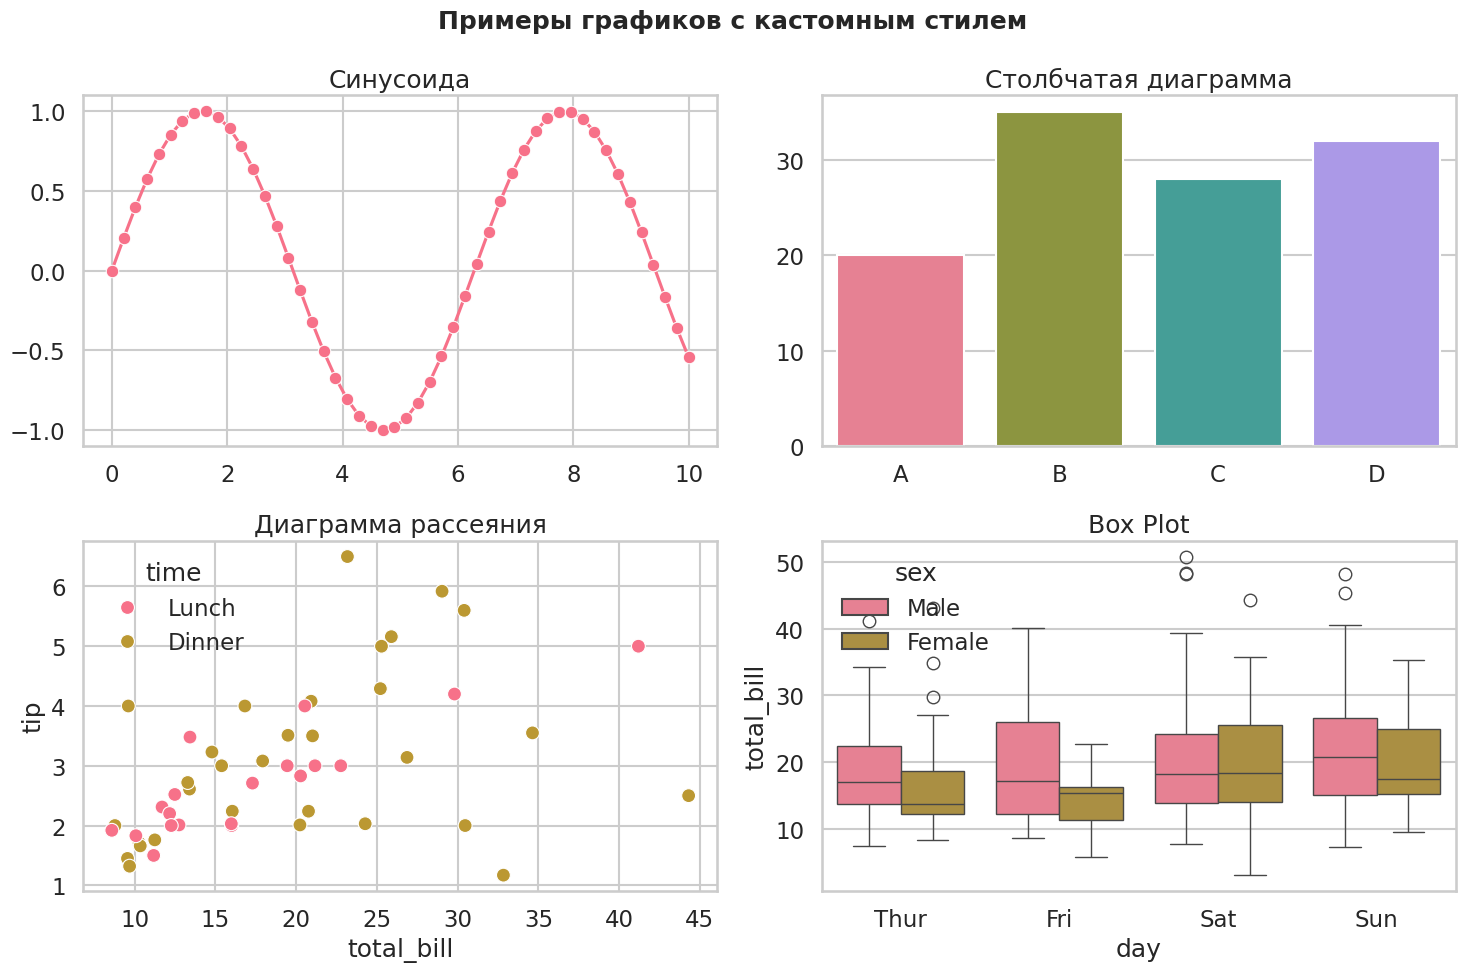

In [40]:
# Применяем кастомный стиль
sns.set_style("whitegrid")
sns.set_context("talk")  # paper, notebook, talk, poster
sns.set_palette("husl")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Примеры графиков с кастомным стилем', fontsize=18, fontweight='bold')

# График 1: Линейный
data_x = np.linspace(0, 10, 50)
sns.lineplot(x=data_x, y=np.sin(data_x), marker='o', ax=axes[0, 0])
axes[0, 0].set_title('Синусоида')

# График 2: Столбчатый
sns.barplot(x=['A', 'B', 'C', 'D'], y=[20, 35, 28, 32], ax=axes[0, 1], palette='husl')
axes[0, 1].set_title('Столбчатая диаграмма')

# График 3: Scatter
tips_sample = tips.sample(50)
sns.scatterplot(data=tips_sample, x='total_bill', y='tip', hue='time', ax=axes[1, 0], s=100)
axes[1, 0].set_title('Диаграмма рассеяния')

# График 4: Box plot
sns.boxplot(data=tips, x='day', y='total_bill', hue='sex', ax=axes[1, 1])
axes[1, 1].set_title('Box Plot')

plt.tight_layout()
plt.show()

---
# 🎯 ФИНАЛЬНОЕ КОМПЛЕКСНОЕ ЗАДАНИЕ

## 📋 Описание задания

Вам нужно провести комплексный анализ датасета (40-50 минут):

### **Часть 1: Разведочный анализ (EDA)**
1. Загрузите датасет (используйте `tips` или создайте свой)
2. Выведите основную информацию (shape, describe, info)
3. Создайте 4 разных графика matplotlib для понимания структуры

### **Часть 2: Статистическая визуализация (Seaborn)**
1. Heatmap корреляций
2. Box plots для сравнения групп
3. Pair plot или joint plot

### **Часть 3: Интерактивность (Plotly)**
1. Минимум 2 интерактивных графика
2. Один график с виджетами для управления параметрами

### **Часть 4: Презентация**
1. Создайте "историю" из ваших визуализаций
2. Каждый график должен отвечать на конкретный вопрос
3. Напишите выводы и рекомендации

## 📊 Шпаргалка: Когда какой график использовать

| Задача | График | Пример |
|--------|--------|--------|
| Временной ряд | Line plot | продажи по месяцам |
| Сравнение категорий | Bar plot | рейтинг стран |
| Распределение | Histogram, KDE | распределение возраста |
| Связь двух переменных | Scatter plot | зарплата vs опыт |
| Сравнение групп | Box plot, Violin | результаты тестов по группам |
| Корреляции | Heatmap | матрица корреляций |
| Части целого | Pie chart | доля рынка (осторожно!) |
| Многомерные данные | Pair plot | исследование новых данных |
| Считание категорий | Count plot | распределение по категориям |
| Регрессия | Regplot | линия тренда между переменными |

## 🎨 Рекомендуемые цветовые палитры

### Для непрерывных данных (perceptually uniform):
- `'viridis'` — от фиолетового к желтому
- `'plasma'` — от фиолетового к желтому (контрастнее)
- `'cividis'` — для людей с дальтонизмом

### Для дивергентных данных (выделение крайностей):
- `'coolwarm'` — голубой → красный
- `'RdYlGn'` — красный → желтый → зеленый
- `'RdBu'` — красный → синий

### Для качественных данных (категории):
- `'Set1'`, `'Set2'`, `'Set3'` — яркие цвета
- `'Pastel1'`, `'Pastel2'` — мягкие цвета
- `'Dark2'` — темные цвета

## ✏️ ФИНАЛЬНОЕ ЗАДАНИЕ

Проведите полный анализ датасета с визуализациями:

### Часть 1: EDA

Часть 1: Разведочный анализ (EDA) датасета Tips
1. Основная информация о датасете:
   Размер: 244 строк, 7 столбцов
   Колонки: total_bill, tip, sex, smoker, day, time, size

2. Типы данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None

3. Описательная статистика:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500   

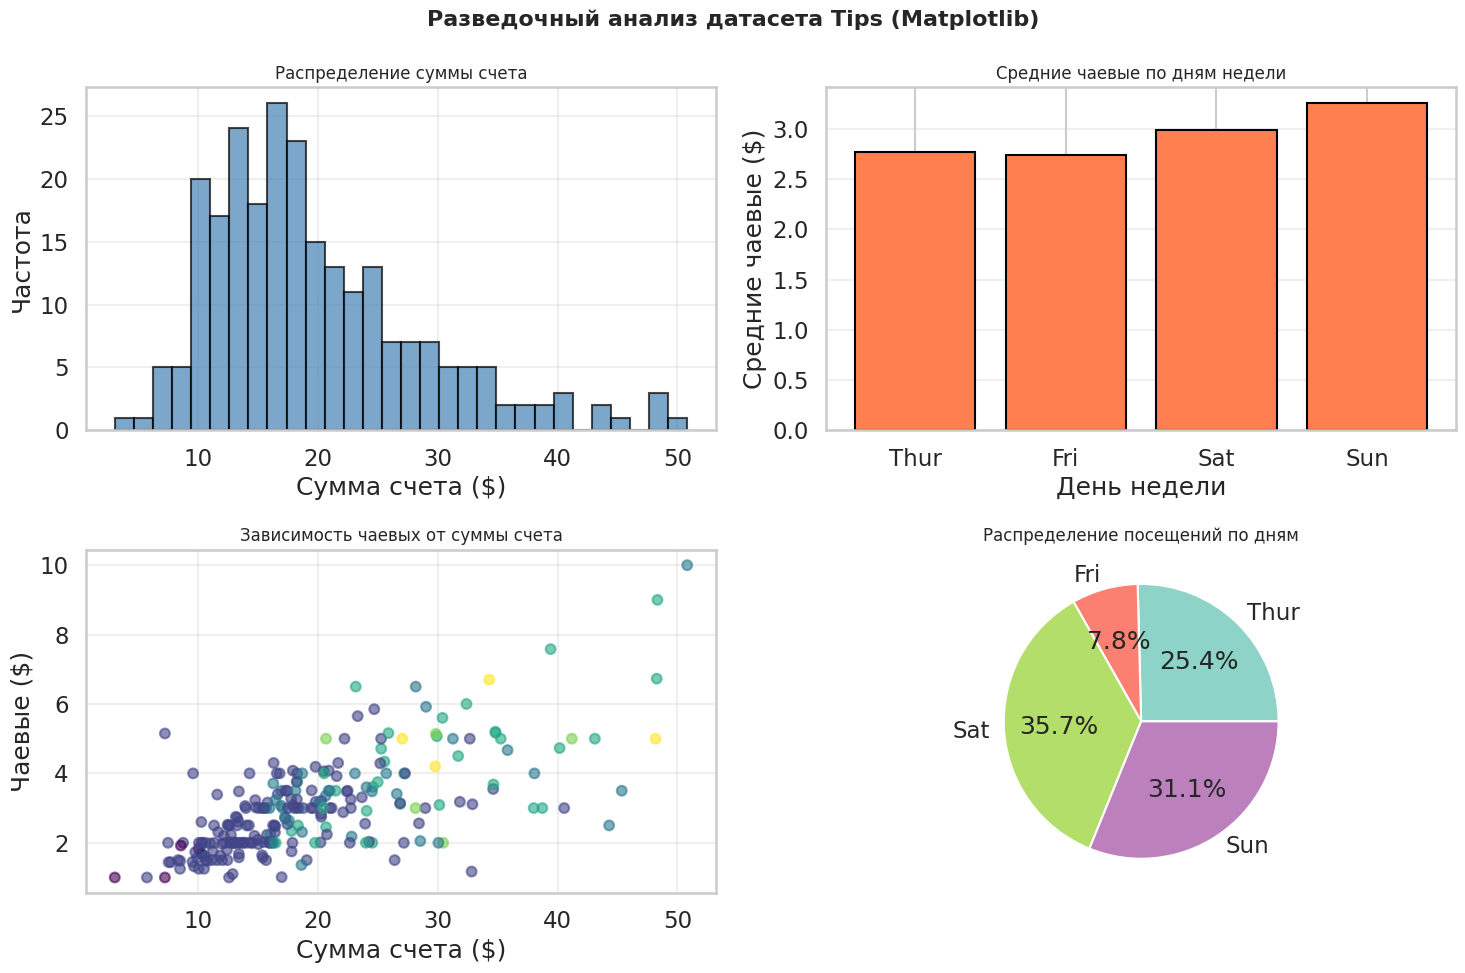

In [61]:
print("Часть 1: Разведочный анализ (EDA) датасета Tips")
print("=" * 60)
print("1. Основная информация о датасете:")
print(f"   Размер: {tips.shape[0]} строк, {tips.shape[1]} столбцов")
print(f"   Колонки: {', '.join(tips.columns)}")
print()
print("2. Типы данных:")
print(tips.info())
print()
print("3. Описательная статистика:")
print(tips.describe())
print()
print("4. Проверка пропущенных значений:")
print(tips.isnull().sum())
print()
print("5. Уникальные значения категориальных переменных:")
for col in ['sex', 'smoker', 'day', 'time']:
    print(f"   {col}: {tips[col].unique()}")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Разведочный анализ датасета Tips (Matplotlib)', fontsize=16, fontweight='bold')

axes[0, 0].hist(tips['total_bill'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Распределение суммы счета', fontsize=12)
axes[0, 0].set_xlabel('Сумма счета ($)')
axes[0, 0].set_ylabel('Частота')
axes[0, 0].grid(alpha=0.3)

avg_tip_by_day = tips.groupby('day')['tip'].mean()
axes[0, 1].bar(avg_tip_by_day.index, avg_tip_by_day.values, color='coral', edgecolor='black')
axes[0, 1].set_title('Средние чаевые по дням недели', fontsize=12)
axes[0, 1].set_xlabel('День недели')
axes[0, 1].set_ylabel('Средние чаевые ($)')
axes[0, 1].grid(axis='y', alpha=0.3)

axes[1, 0].scatter(tips['total_bill'], tips['tip'], alpha=0.6, c=tips['size'], cmap='viridis', s=50)
axes[1, 0].set_title('Зависимость чаевых от суммы счета', fontsize=12)
axes[1, 0].set_xlabel('Сумма счета ($)')
axes[1, 0].set_ylabel('Чаевые ($)')
axes[1, 0].grid(alpha=0.3)

days_order = ['Thur', 'Fri', 'Sat', 'Sun']
counts = [tips[tips['day'] == day].shape[0] for day in days_order]
axes[1, 1].pie(counts, labels=days_order, autopct='%1.1f%%', colors=plt.cm.Set3(np.arange(4)/4))
axes[1, 1].set_title('Распределение посещений по дням', fontsize=12)

plt.tight_layout()
plt.show()

### Часть 2: Matplotlib визуализации

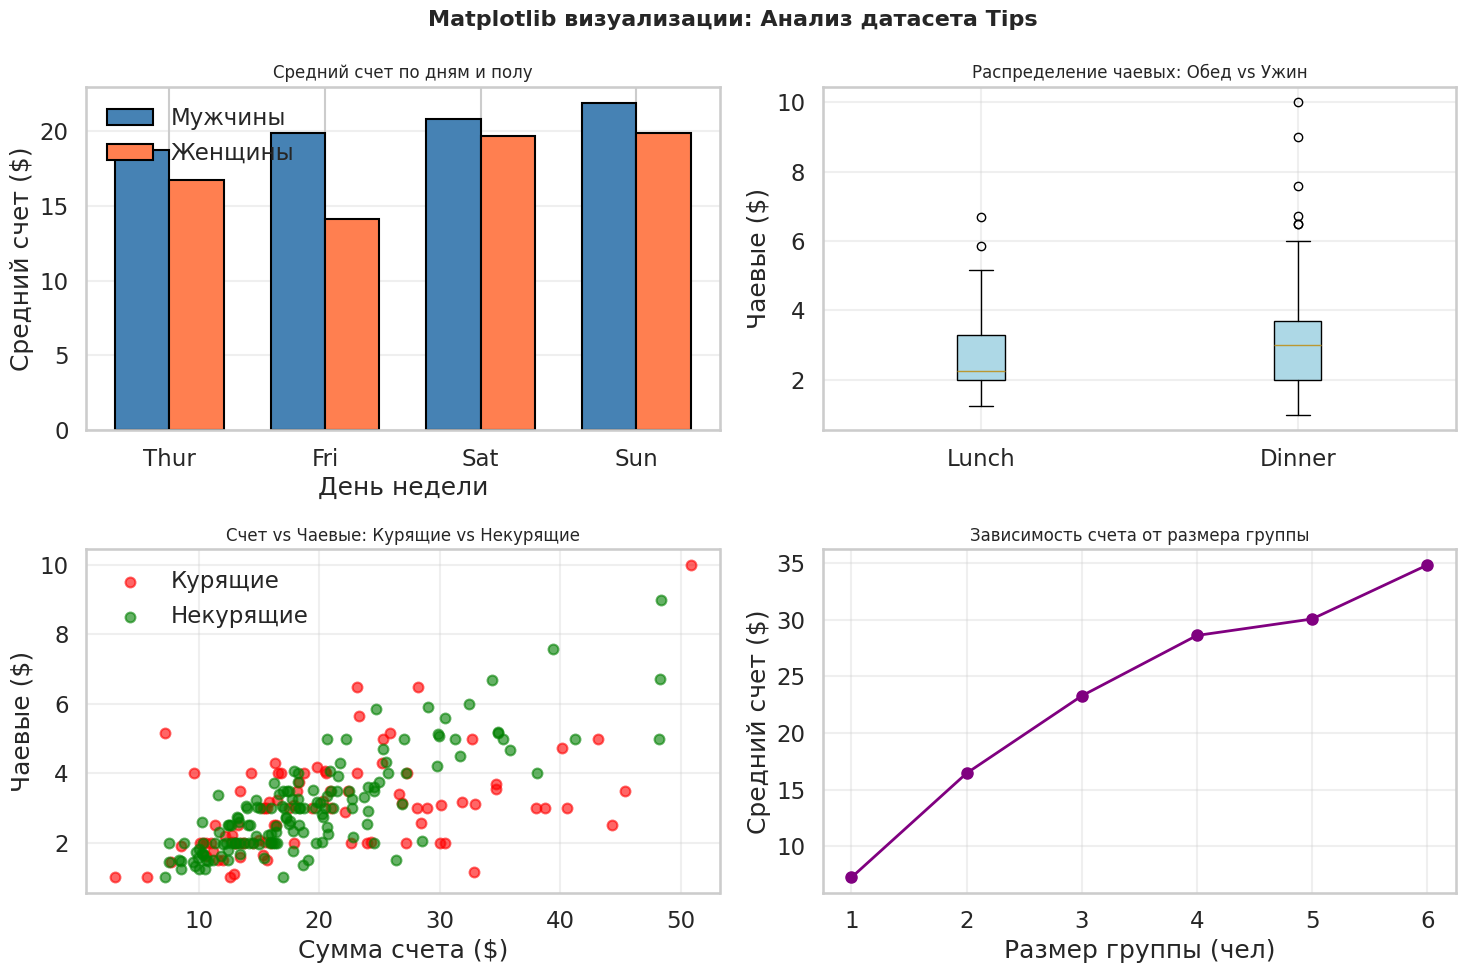

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Matplotlib визуализации: Анализ датасета Tips', fontsize=16, fontweight='bold')

days = ['Thur', 'Fri', 'Sat', 'Sun']
sales_men = [tips[(tips['day'] == day) & (tips['sex'] == 'Male')]['total_bill'].mean() for day in days]
sales_women = [tips[(tips['day'] == day) & (tips['sex'] == 'Female')]['total_bill'].mean() for day in days]

x = np.arange(len(days))
width = 0.35
axes[0, 0].bar(x - width/2, sales_men, width, label='Мужчины', color='steelblue', edgecolor='black')
axes[0, 0].bar(x + width/2, sales_women, width, label='Женщины', color='coral', edgecolor='black')
axes[0, 0].set_title('Средний счет по дням и полу', fontsize=12)
axes[0, 0].set_xlabel('День недели')
axes[0, 0].set_ylabel('Средний счет ($)')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(days)
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

lunch_tips = tips[tips['time'] == 'Lunch']['tip']
dinner_tips = tips[tips['time'] == 'Dinner']['tip']
axes[0, 1].boxplot([lunch_tips, dinner_tips], labels=['Lunch', 'Dinner'], patch_artist=True,
                   boxprops=dict(facecolor='lightblue'))
axes[0, 1].set_title('Распределение чаевых: Обед vs Ужин', fontsize=12)
axes[0, 1].set_ylabel('Чаевые ($)')
axes[0, 1].grid(alpha=0.3)

smoker_data = tips[tips['smoker'] == 'Yes']
non_smoker_data = tips[tips['smoker'] == 'No']
axes[1, 0].scatter(smoker_data['total_bill'], smoker_data['tip'], alpha=0.6, s=50, color='red', label='Курящие')
axes[1, 0].scatter(non_smoker_data['total_bill'], non_smoker_data['tip'], alpha=0.6, s=50, color='green', label='Некурящие')
axes[1, 0].set_title('Счет vs Чаевые: Курящие vs Некурящие', fontsize=12)
axes[1, 0].set_xlabel('Сумма счета ($)')
axes[1, 0].set_ylabel('Чаевые ($)')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

size_groups = tips.groupby('size')['total_bill'].mean()
axes[1, 1].plot(size_groups.index, size_groups.values, 'o-', linewidth=2, markersize=8, color='purple')
axes[1, 1].set_title('Зависимость счета от размера группы', fontsize=12)
axes[1, 1].set_xlabel('Размер группы (чел)')
axes[1, 1].set_ylabel('Средний счет ($)')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Часть 3: Seaborn визуализации

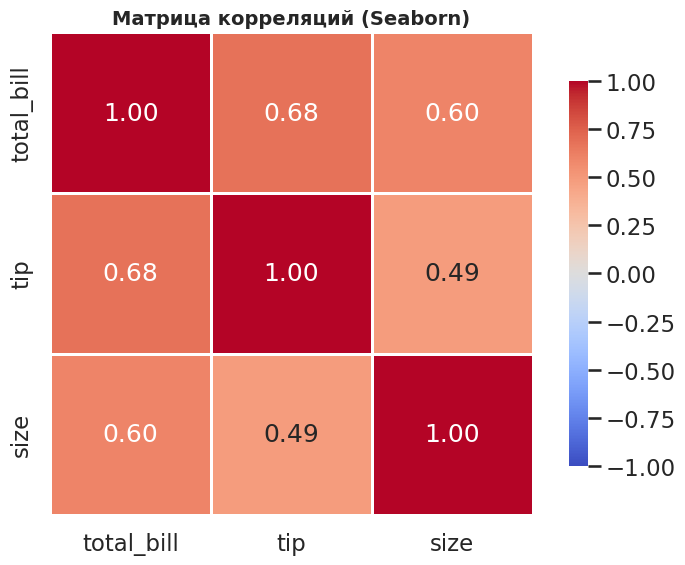

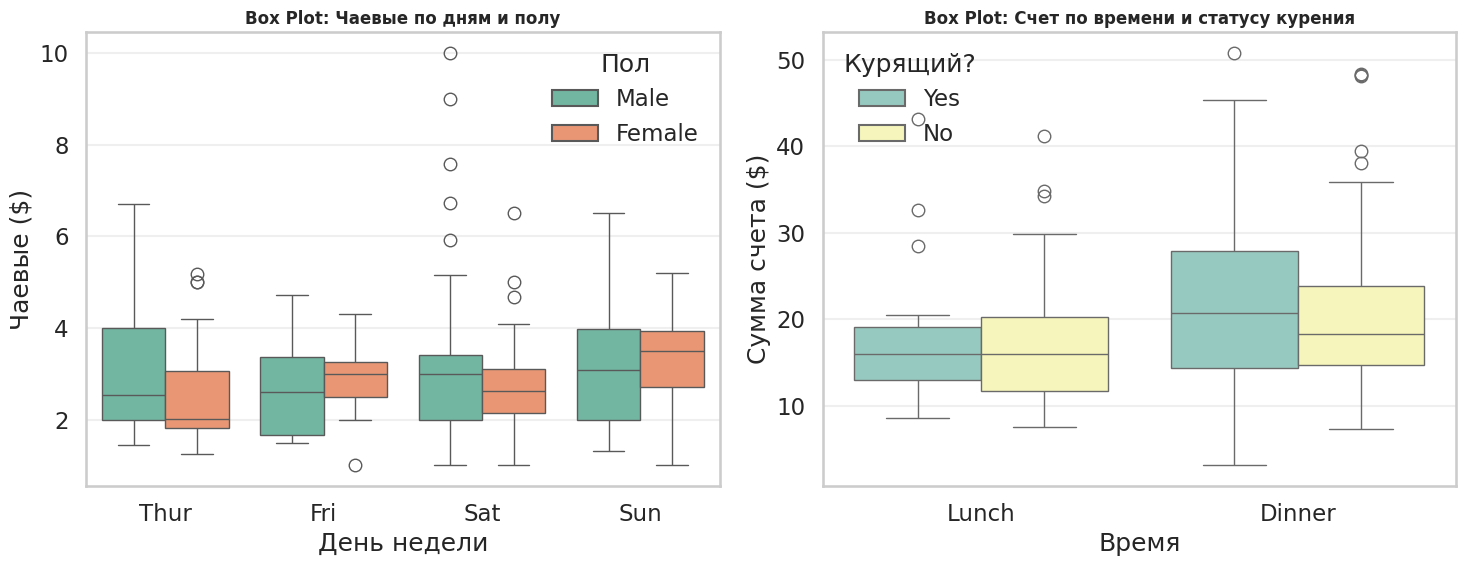

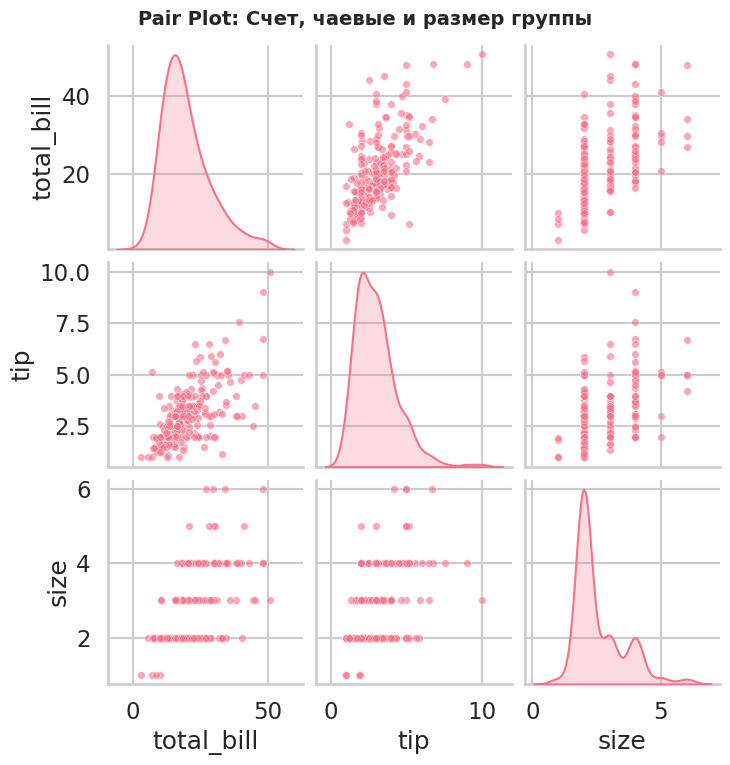

In [64]:
plt.figure(figsize=(8, 6))
correlation = tips.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, square=True,
            linewidths=1, fmt='.2f', vmin=-1, vmax=1,
            cbar_kws={"shrink": 0.8})
plt.title('Матрица корреляций (Seaborn)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(data=tips, x='day', y='tip', hue='sex', ax=axes[0], palette='Set2')
axes[0].set_title('Box Plot: Чаевые по дням и полу', fontsize=12, fontweight='bold')
axes[0].set_xlabel('День недели')
axes[0].set_ylabel('Чаевые ($)')
axes[0].legend(title='Пол')
axes[0].grid(axis='y', alpha=0.3)

sns.boxplot(data=tips, x='time', y='total_bill', hue='smoker', ax=axes[1], palette='Set3')
axes[1].set_title('Box Plot: Счет по времени и статусу курения', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Время')
axes[1].set_ylabel('Сумма счета ($)')
axes[1].legend(title='Курящий?')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

g = sns.pairplot(tips[['total_bill', 'tip', 'size']], diag_kind='kde',
                 plot_kws={'alpha': 0.6, 's': 30})
g.fig.suptitle('Pair Plot: Счет, чаевые и размер группы', fontsize=14, fontweight='bold', y=1.02)
plt.show()


### Часть 4: Plotly интерактивные графики

In [65]:
fig1 = px.scatter_3d(tips, x='total_bill', y='tip', z='size',
                     color='time', size='tip',
                     hover_data=['day', 'sex', 'smoker'],
                     title='3D Scatter Plot: Счет, Чаевые и Размер группы',
                     labels={'total_bill': 'Счет ($)', 'tip': 'Чаевые ($)', 'size': 'Размер группы'})
fig1.update_layout(showlegend=True)
fig1.show()

avg_data = tips.groupby(['day', 'sex'])[['total_bill', 'tip']].mean().reset_index()
fig2 = px.scatter(avg_data, x='total_bill', y='tip', color='sex', size='total_bill',
                  hover_data=['day'], facet_col='day',
                  title='Средние значения по дням и полу',
                  labels={'total_bill': 'Средний счет ($)', 'tip': 'Средние чаевые ($)'})
fig2.update_layout(showlegend=True)
fig2.show()

fig3 = px.sunburst(tips, path=['day', 'time', 'sex'], values='total_bill',
                   title='Sunburst Chart: Распределение счета по дням, времени и полу',
                   color='total_bill', color_continuous_scale='RdBu')
fig3.show()


### Часть 5: Выводы

## 📝 Напишите выводы:

1. **Ключевые находки:** Что вы узнали из визуализаций?
2. **Паттерны:** Какие закономерности вы заметили?
3. **Аномалии:** Есть ли необычные точки данных?
4. **Рекомендации:** Что можно сделать на основе анализа?

Ключевые находки

In [66]:
# 1. Корреляция между суммой счета и чаевыми
corr = tips['total_bill'].corr(tips['tip'])
print(f"Корреляция счет-чаевые: {corr:.2f}")

# 2. Средние чаевые по дням
print("\nСредние чаевые по дням:")
print(tips.groupby('day')['tip'].mean().sort_values(ascending=False))

# 3. Чаевые по полу
print("\nСредние чаевые по полу:")
print(tips.groupby('sex')['tip'].mean())

# 4. Счета курящих vs некурящих
print("\nСредний счет по статусу курения:")
print(tips.groupby('smoker')['total_bill'].mean())

Корреляция счет-чаевые: 0.68

Средние чаевые по дням:
day
Sun     3.255132
Sat     2.993103
Thur    2.771452
Fri     2.734737
Name: tip, dtype: float64

Средние чаевые по полу:
sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

Средний счет по статусу курения:
smoker
Yes    20.756344
No     19.188278
Name: total_bill, dtype: float64


Паттерны

In [67]:
# 1. Процент чаевых от счета
tips['tip_percentage'] = (tips['tip'] / tips['total_bill']) * 100
print(f"Средний процент чаевых: {tips['tip_percentage'].mean():.1f}%")
print(f"Диапазон: {tips['tip_percentage'].min():.1f}%-{tips['tip_percentage'].max():.1f}%")

# 2. Посещаемость и средние чеки по дням
print("\nПосещаемость по дням:")
print(tips['day'].value_counts())
print("\nСредние чеки по дням:")
print(tips.groupby('day')['total_bill'].mean().sort_values(ascending=False))

# 3. Корреляция размера группы и счета
corr_size = tips['size'].corr(tips['total_bill'])
print(f"\nКорреляция размер-счет: {corr_size:.2f}")

# 4. Сравнение времени
print("\nСредний счет по времени:")
print(tips.groupby('time')['total_bill'].mean())

Средний процент чаевых: 16.1%
Диапазон: 3.6%-71.0%

Посещаемость по дням:
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

Средние чеки по дням:
day
Sun     21.410000
Sat     20.441379
Thur    17.682742
Fri     17.151579
Name: total_bill, dtype: float64

Корреляция размер-счет: 0.60

Средний счет по времени:
time
Lunch     17.168676
Dinner    20.797159
Name: total_bill, dtype: float64


Аномалии

In [68]:
# 1. Выбросы с высокими счетами и низкими чаевыми
high_bill_low_tip = tips[(tips['total_bill'] > 40) & (tips['tip_percentage'] < 10)]
print(f"Клиентов с чеком >40$ и чаевыми <10%: {len(high_bill_low_tip)}")

# 2. Посещаемость в пятницу
friday_count = len(tips[tips['day'] == 'Fri'])
print(f"Посещений в пятницу: {friday_count}")

# 3. Непропорционально высокие чаевые
high_tip = tips[tips['tip_percentage'] > 30]
print(f"Клиентов с чаевыми >30%: {len(high_tip)}")

Клиентов с чеком >40$ и чаевыми <10%: 3
Посещений в пятницу: 19
Клиентов с чаевыми >30%: 3


Визуал

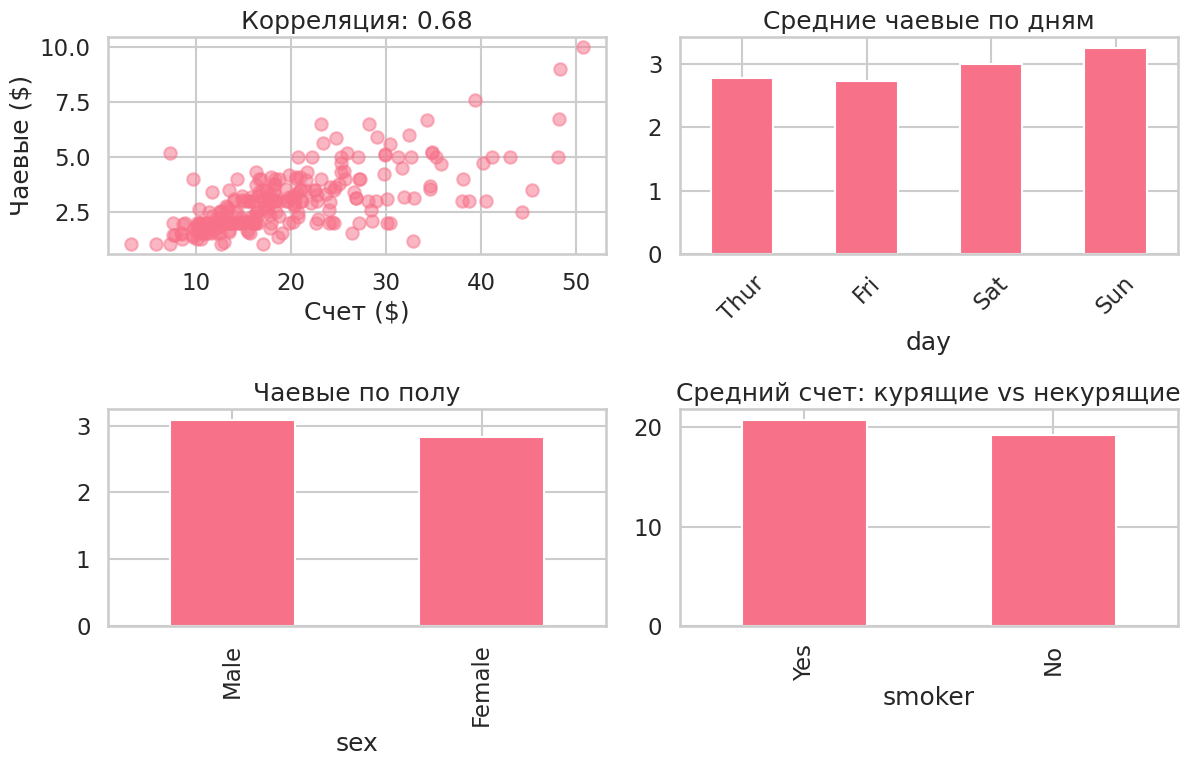

In [69]:
# Самые важные графики для подтверждения выводов
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Корреляция
axes[0,0].scatter(tips['total_bill'], tips['tip'], alpha=0.5)
axes[0,0].set_title(f'Корреляция: {corr:.2f}')
axes[0,0].set_xlabel('Счет ($)')
axes[0,0].set_ylabel('Чаевые ($)')

# Чаевые по дням
tips.groupby('day')['tip'].mean().plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Средние чаевые по дням')
axes[0,1].tick_params(axis='x', rotation=45)

# Чаевые по полу
tips.groupby('sex')['tip'].mean().plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Чаевые по полу')

# Счета курящих vs некурящих
tips.groupby('smoker')['total_bill'].mean().plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Средний счет: курящие vs некурящие')

plt.tight_layout()
plt.show()

1. Ключевые находки:
   - Сильная положительная корреляция (0.68) между суммой счета и чаевыми
   - Самые высокие средние чаевые в выходные дни (особенно в воскресенье)
   - Мужчины в среднем оставляют больше чаевых, чем женщины
   - Курящие клиенты в среднем имеют более высокие счета

2. Паттерны:
   - Чем больше сумма счета, тем выше чаевые (примерно 15-20% от счета)
   - В выходные дни (суббота, воскресенье) посещаемость и средние чеки выше
   - Размер группы положительно коррелирует с суммой счета
   - Время ужина ассоциируется с более высокими счетами по сравнению с обедом

3. Аномалии:
   - Несколько выбросов с очень высокими счетами (>40$) и низкими чаевыми
   - В пятницу относительно низкая посещаемость несмотря на конец недели
   - Некоторые клиенты оставляют непропорционально высокие чаевые (>30% от счета)

4. Дата Сайенс рекомендации:
   - Логичнее всего сфокусироваться на увеличении посещаемости в пятницу (специальные предложения), можно фокусить мужской пол, можно всех
   - Тренировать персонал для улучшения сервиса и увеличения чаевых
   - Исследовать причины низких чаевых при высоких чеках
   - Разработать стратегию для привлечения большего количества клиентов в выходные дни
   - Улучшить приложение, сделать A/B тесты, доиследовать и донастроить воронку продаж для всех полов, дней, времени суток

---

## 📚 Полезные ресурсы

- **Matplotlib gallery:** https://matplotlib.org/stable/gallery/
- **Seaborn examples:** https://seaborn.pydata.org/examples/
- **Plotly charts:** https://plotly.com/python/
- **Color brewer:** https://colorbrewer2.org/ (подбор цветовых палитр)
- **Data Viz Best Practices:** https://www.interaction-design.org/literature/article/information-visualization

## 🎓 Критерии оценки

- ✅ Разнообразие типов графиков (5 баллов)
- ✅ Качество оформления и читаемость (3 балла)
- ✅ Интерактивность (2 балла)
- ✅ Осмысленность анализа и выводы (5 баллов)

**Максимум: 15 баллов**